In [1]:
%matplotlib inline
#Amitava Chakraborty - 06th May 2020
#Qiskit Challenge 4

#Given a 16x16 Unitary Matrix
#Decompose it in 2x2 Sub Unitary Matrices
#Retrieve U3 Gates for the matrices

# Importing standard Qiskit libraries and configuring account
import numpy as np
from qiskit import(QuantumRegister,
  QuantumCircuit,
  execute,
  Aer)

import qiskit.tools.jupyter
%qiskit_version_table

In [2]:
pauliX = np.array([[0, 1], [1, 0]], dtype=np.complex128)
#Tolerance for a 0
tolerance = 10e-9
backend = Aer.get_backend('unitary_simulator')

In [3]:
def isUnitary(A):
    #A should be a square matrix, i.e., shape tuple is (n,n), we take the first of the tuple
    n = A.shape[0]
    if (A.shape != (n, n)):
        raise ValueError("Matrix is not square.")
    A = np.array(A)
    #Matrix Mult : A and A-dagger(=A conjugate then transpose)
    B = A @ A.conj().T
    #If A is unitary then B must be an identity matrix
    return np.allclose(np.eye(n), B)


In [4]:
def getEulerAngles_for_U3(unitary_matrix):
    import scipy.linalg as la
    """
    Find angles (theta, phi, lambda) such that
    unitary_matrix = phase * Rz(phi) * Ry(theta) * Rz(lambda)

    Args:
        unitary_matrix (ndarray): 2x2 unitary matrix

    Returns:
        tuple: (theta, phi, lambda) Euler angles of SU(2)

    """
    phase = la.det(unitary_matrix)**(-1.0/2.0)
    U = phase * unitary_matrix  # U in SU(2)
    # OpenQASM SU(2) parameterization:
    # U[0, 0] = exp(-i(phi+lambda)/2) * cos(theta/2)
    # U[0, 1] = -exp(-i(phi-lambda)/2) * sin(theta/2)
    # U[1, 0] = exp(i(phi-lambda)/2) * sin(theta/2)
    # U[1, 1] = exp(i(phi+lambda)/2) * cos(theta/2)
    theta = 2 * math.atan2(abs(U[1, 0]), abs(U[0, 0]))

    # Find phi and lambda
    phiplambda = 2 * np.angle(U[1, 1])
    phimlambda = 2 * np.angle(U[1, 0])
    phi = (phiplambda + phimlambda) / 2.0
    lamb = (phiplambda - phimlambda) / 2.0

    # Check the solution
    Rzphi = np.array([[np.exp(-1j*phi/2.0), 0],
                      [0, np.exp(1j*phi/2.0)]], dtype=complex)
    Rytheta = np.array([[np.cos(theta/2.0), -np.sin(theta/2.0)],
                        [np.sin(theta/2.0), np.cos(theta/2.0)]], dtype=complex)
    Rzlambda = np.array([[np.exp(-1j*lamb/2.0), 0],
                         [0, np.exp(1j*lamb/2.0)]], dtype=complex)
    V = np.dot(Rzphi, np.dot(Rytheta, Rzlambda))
    if la.norm(V - U) > tolerance:
        raise ValueError("compiling.euler_angles_1q incorrect result norm(V-U)={}".
                          format(la.norm(V-U)))
    return theta, phi, lamb

In [5]:
w = np.exp((2j / 3) * np.pi)
A = np.array([[1, 1, 1, 0], 
                  [1, w, w * w, 0],
                  [1, w * w, w, 0], 
                  [0, 0, 0, -1j*np.sqrt(3)]]) / np.sqrt(3)
print(A)
print (A.shape)

[[ 0.57735027+0.j   0.57735027+0.j   0.57735027+0.j   0.        +0.j ]
 [ 0.57735027+0.j  -0.28867513+0.5j -0.28867513-0.5j  0.        +0.j ]
 [ 0.57735027+0.j  -0.28867513-0.5j -0.28867513+0.5j  0.        +0.j ]
 [ 0.        +0.j   0.        +0.j   0.        +0.j   0.        -1.j ]]
(4, 4)


In [6]:
from qiskit.quantum_info import random_unitary
C = random_unitary(4, seed=1)
C = C.data
print(C)
print(C.shape)
print(isUnitary(C))

[[ 0.1151176 +0.01323184j  0.72322792-0.37416595j  0.06300181-0.2500261j
   0.42187044+0.281171j  ]
 [ 0.30158322+0.00271224j -0.2016684 -0.2963437j  -0.21570242+0.51829281j
  -0.10894229+0.67344419j]
 [ 0.12144276-0.9031157j   0.20935163-0.05769682j  0.04467216+0.04998444j
  -0.33116369-0.09117686j]
 [-0.24532032+0.07116665j  0.39850686+0.04986727j -0.18435233+0.76150044j
   0.15108304-0.36981617j]]
(4, 4)
True


In [7]:
B= np.array([[-0.21338835+0.33838835j, -0.14016504-0.08838835j,  0.21338835-0.08838835j,
   0.03661165+0.08838835j,  0.08838835-0.03661165j, -0.08838835-0.21338835j,
  -0.08838835+0.14016504j,  0.33838835+0.21338835j,  0.21338835-0.08838835j,
   0.03661165+0.08838835j,  0.39016504+0.08838835j, -0.03661165+0.16161165j,
   0.16161165+0.03661165j,  0.08838835-0.39016504j,  0.08838835-0.03661165j,
  -0.08838835-0.21338835j],
 [-0.14016504-0.08838835j, -0.21338835+0.33838835j,  0.03661165+0.08838835j,
   0.21338835-0.08838835j, -0.08838835-0.21338835j,  0.08838835-0.03661165j,
   0.33838835+0.21338835j, -0.08838835+0.14016504j,  0.03661165+0.08838835j,
   0.21338835-0.08838835j, -0.03661165+0.16161165j,  0.39016504+0.08838835j,
   0.08838835-0.39016504j,  0.16161165+0.03661165j, -0.08838835-0.21338835j,
   0.08838835-0.03661165j],
 [ 0.21338835-0.08838835j,  0.03661165+0.08838835j, -0.21338835+0.33838835j,
  -0.14016504-0.08838835j, -0.08838835+0.14016504j,  0.33838835+0.21338835j,
   0.08838835-0.03661165j, -0.08838835-0.21338835j,  0.39016504+0.08838835j,
  -0.03661165+0.16161165j,  0.21338835-0.08838835j,  0.03661165+0.08838835j,
   0.08838835-0.03661165j, -0.08838835-0.21338835j,  0.16161165+0.03661165j,
   0.08838835-0.39016504j],
 [ 0.03661165+0.08838835j,  0.21338835-0.08838835j, -0.14016504-0.08838835j,
  -0.21338835+0.33838835j,  0.33838835+0.21338835j, -0.08838835+0.14016504j,
  -0.08838835-0.21338835j,  0.08838835-0.03661165j, -0.03661165+0.16161165j,
   0.39016504+0.08838835j,  0.03661165+0.08838835j,  0.21338835-0.08838835j,
  -0.08838835-0.21338835j,  0.08838835-0.03661165j,  0.08838835-0.39016504j,
   0.16161165+0.03661165j],
 [ 0.08838835-0.03661165j, -0.08838835-0.21338835j, -0.08838835+0.14016504j,
   0.33838835+0.21338835j, -0.21338835+0.33838835j, -0.14016504-0.08838835j,
   0.21338835-0.08838835j,  0.03661165+0.08838835j,  0.16161165+0.03661165j,
   0.08838835-0.39016504j,  0.08838835-0.03661165j, -0.08838835-0.21338835j,
   0.21338835-0.08838835j,  0.03661165+0.08838835j,  0.39016504+0.08838835j,
  -0.03661165+0.16161165j],
 [-0.08838835-0.21338835j,  0.08838835-0.03661165j,  0.33838835+0.21338835j,
  -0.08838835+0.14016504j, -0.14016504-0.08838835j, -0.21338835+0.33838835j,
   0.03661165+0.08838835j,  0.21338835-0.08838835j,  0.08838835-0.39016504j,
   0.16161165+0.03661165j, -0.08838835-0.21338835j,  0.08838835-0.03661165j,
   0.03661165+0.08838835j,  0.21338835-0.08838835j, -0.03661165+0.16161165j,
   0.39016504+0.08838835j],
 [-0.08838835+0.14016504j,  0.33838835+0.21338835j,  0.08838835-0.03661165j,
  -0.08838835-0.21338835j,  0.21338835-0.08838835j,  0.03661165+0.08838835j,
  -0.21338835+0.33838835j, -0.14016504-0.08838835j,  0.08838835-0.03661165j,
  -0.08838835-0.21338835j,  0.16161165+0.03661165j,  0.08838835-0.39016504j,
   0.39016504+0.08838835j, -0.03661165+0.16161165j,  0.21338835-0.08838835j,
   0.03661165+0.08838835j],
 [ 0.33838835+0.21338835j, -0.08838835+0.14016504j, -0.08838835-0.21338835j,
   0.08838835-0.03661165j,  0.03661165+0.08838835j,  0.21338835-0.08838835j,
  -0.14016504-0.08838835j, -0.21338835+0.33838835j, -0.08838835-0.21338835j,
   0.08838835-0.03661165j,  0.08838835-0.39016504j,  0.16161165+0.03661165j,
  -0.03661165+0.16161165j,  0.39016504+0.08838835j,  0.03661165+0.08838835j,
   0.21338835-0.08838835j],
 [ 0.21338835-0.08838835j,  0.03661165+0.08838835j,  0.39016504+0.08838835j,
  -0.03661165+0.16161165j,  0.16161165+0.03661165j,  0.08838835-0.39016504j,
   0.08838835-0.03661165j, -0.08838835-0.21338835j, -0.21338835+0.33838835j,
  -0.14016504-0.08838835j,  0.21338835-0.08838835j,  0.03661165+0.08838835j,
   0.08838835-0.03661165j, -0.08838835-0.21338835j, -0.08838835+0.14016504j,
   0.33838835+0.21338835j],
 [ 0.03661165+0.08838835j,  0.21338835-0.08838835j, -0.03661165+0.16161165j,
   0.39016504+0.08838835j,  0.08838835-0.39016504j,  0.16161165+0.03661165j,
  -0.08838835-0.21338835j,  0.08838835-0.03661165j, -0.14016504-0.08838835j,
  -0.21338835+0.33838835j,  0.03661165+0.08838835j,  0.21338835-0.08838835j,
  -0.08838835-0.21338835j,  0.08838835-0.03661165j,  0.33838835+0.21338835j,
  -0.08838835+0.14016504j],
 [ 0.39016504+0.08838835j, -0.03661165+0.16161165j,  0.21338835-0.08838835j,
   0.03661165+0.08838835j,  0.08838835-0.03661165j, -0.08838835-0.21338835j,
   0.16161165+0.03661165j,  0.08838835-0.39016504j,  0.21338835-0.08838835j,
   0.03661165+0.08838835j, -0.21338835+0.33838835j, -0.14016504-0.08838835j,
  -0.08838835+0.14016504j,  0.33838835+0.21338835j,  0.08838835-0.03661165j,
  -0.08838835-0.21338835j],
 [-0.03661165+0.16161165j,  0.39016504+0.08838835j,  0.03661165+0.08838835j,
   0.21338835-0.08838835j, -0.08838835-0.21338835j,  0.08838835-0.03661165j,
   0.08838835-0.39016504j,  0.16161165+0.03661165j,  0.03661165+0.08838835j,
   0.21338835-0.08838835j, -0.14016504-0.08838835j, -0.21338835+0.33838835j,
   0.33838835+0.21338835j, -0.08838835+0.14016504j, -0.08838835-0.21338835j,
   0.08838835-0.03661165j],
 [ 0.16161165+0.03661165j,  0.08838835-0.39016504j,  0.08838835-0.03661165j,
  -0.08838835-0.21338835j,  0.21338835-0.08838835j,  0.03661165+0.08838835j,
   0.39016504+0.08838835j, -0.03661165+0.16161165j,  0.08838835-0.03661165j,
  -0.08838835-0.21338835j, -0.08838835+0.14016504j,  0.33838835+0.21338835j,
  -0.21338835+0.33838835j, -0.14016504-0.08838835j,  0.21338835-0.08838835j,
   0.03661165+0.08838835j],
 [ 0.08838835-0.39016504j,  0.16161165+0.03661165j, -0.08838835-0.21338835j,
   0.08838835-0.03661165j,  0.03661165+0.08838835j,  0.21338835-0.08838835j,
  -0.03661165+0.16161165j,  0.39016504+0.08838835j, -0.08838835-0.21338835j,
   0.08838835-0.03661165j,  0.33838835+0.21338835j, -0.08838835+0.14016504j,
  -0.14016504-0.08838835j, -0.21338835+0.33838835j,  0.03661165+0.08838835j,
   0.21338835-0.08838835j],
 [ 0.08838835-0.03661165j, -0.08838835-0.21338835j,  0.16161165+0.03661165j,
   0.08838835-0.39016504j,  0.39016504+0.08838835j, -0.03661165+0.16161165j,
   0.21338835-0.08838835j,  0.03661165+0.08838835j, -0.08838835+0.14016504j,
   0.33838835+0.21338835j,  0.08838835-0.03661165j, -0.08838835-0.21338835j,
   0.21338835-0.08838835j,  0.03661165+0.08838835j, -0.21338835+0.33838835j,
  -0.14016504-0.08838835j],
 [-0.08838835-0.21338835j,  0.08838835-0.03661165j,  0.08838835-0.39016504j,
   0.16161165+0.03661165j, -0.03661165+0.16161165j,  0.39016504+0.08838835j,
   0.03661165+0.08838835j,  0.21338835-0.08838835j,  0.33838835+0.21338835j,
  -0.08838835+0.14016504j, -0.08838835-0.21338835j,  0.08838835-0.03661165j,
   0.03661165+0.08838835j,  0.21338835-0.08838835j, -0.14016504-0.08838835j,
  -0.21338835+0.33838835j]])

In [8]:
isUnitary(A)

True

In [9]:
isUnitary(B)

True

In [10]:
import math

class Gate2:
    """Represents gate acting on one qubit.
    Definitions:
    Ry(a) = exp(0.5*i*a*sigma_y)
    Rz(a) = exp(0.5*i*a*sigma_z)
    R1(a) = diag(1, exp(i*a))
    """

    def __init__(self, name, arg=None):
        assert name in ['Ry', 'Rz', 'R1', 'X']
        self.name = name
        self.arg = arg

    def to_matrix(self):
        if self.name == 'Ry':
            return np.array([[np.cos(self.arg / 2), np.sin(self.arg / 2)],
                             [-np.sin(self.arg / 2), np.cos(self.arg / 2)]])
        elif self.name == 'Rz':
            return np.diag([np.exp(0.5j * self.arg), np.exp(-0.5j * self.arg)])
        elif self.name == 'R1':
            return np.diag([1.0, np.exp(1j * self.arg)])
        elif self.name == 'X':
            return PAULI_X

    def is_identity(self):
        return np.allclose(self.to_matrix(), np.eye(2))

    def __repr__(self):
        if self.arg is not None:
            return self.name + "(" + str(self.arg) + ")"
        else:
            return self.name




class FullyControlledGate():
    """ Represents fully contolled gate.
    `flip_mask` has ones at positions, for which qubit should be flipped before
    and after applying operation.
    """

    def __init__(self, gate2, qubit_id, qubit_count, flip_mask=0):
        self.gate2 = gate2
        self.qubit_id = qubit_id
        self.flip_mask = flip_mask
        self.qubit_count = qubit_count

    def without_flips(self):
        return FullyControlledGate(self.gate2, self.qubit_id, self.qubit_count, flip_mask=0)

    def to_matrix(self):
        matrix_size = 2**self.qubit_count
        index2 = (matrix_size - 1) - self.flip_mask
        index1 = index2 - 2**self.qubit_id
        matrix = TwoLevelUnitary(
            self.gate2.to_matrix(),
            matrix_size,
            index1,
            index2)
        return matrix.get_full_matrix()

    def __repr__(self):
        theta = self.gate2[0]
        phi = self.gate2[1]
        lambda1 = self.gate2[2]
        #return "qc.u3(%s, %s, %s, %d), %s, %s" % (theta,phi,lambda1,self.qubit_id, self.qubit_count, self.flip_mask)
        return "qc.u3(%s, %s, %s, %d)" % (theta,phi,lambda1,self.qubit_id)

    def type(self):
        return self.gate2.name + "-FC"


def gates_to_matrix(gates):
    """Converts gate sequence to matrix implemented by this sequence."""
    result = np.eye(2 ** gates[0].qubit_count)
    for gate in gates:
        assert isinstance(gate, Gate)
        result = gate.to_matrix() @ result
    return result


def apply_on_qubit(gates, qubit_id, qubit_count):
    """Converts Gate2 gates to GateSingle gates acting on the same qubit."""
    return [GateSingle(gate, qubit_id, qubit_count) for gate in gates]



#AMC
def unitary2x2_to_U3(A):
    """Decomposes 2x2 unitary to U3 gate
    """
    theta, phi, lambda1 = getEulerAngles_for_U3(A)
    return np.array([theta, phi, lambda1])


    
    


class TwoLevelUnitary:
    """Represents two-level unitary matrix.
    Two-level uniary matrix is a unitary matrix obtained from the identity
    matrix by changing a 2x2 principal submatrix.
    """

    def __init__(self, matrix2x2, matrix_size, index1, index2):
        assert index1 != index2
        assert index1 < matrix_size and index2 < matrix_size
        assert matrix2x2.shape == (2, 2)
        assert isUnitary(matrix2x2)

        self.matrix_size = matrix_size
        self.index1 = index1
        self.index2 = index2
        self.matrix_2x2 = matrix2x2
        self.order_indices()

    def __repr__(self):
        self.order_indices()
        return "%s on (%d, %d)" % (
            str(self.matrix_2x2), self.index1, self.index2)

    def order_indices(self):
        if self.index1 > self.index2:
            self.index1, self.index2 = self.index2, self.index1
            self.matrix_2x2 = pauliX @ self.matrix_2x2 @ pauliX

    def get_full_matrix(self):
        matrix_full = np.eye(self.matrix_size, dtype=np.complex128)
        matrix_full[self.index1, self.index1] = self.matrix_2x2[0, 0]
        matrix_full[self.index1, self.index2] = self.matrix_2x2[0, 1]
        matrix_full[self.index2, self.index1] = self.matrix_2x2[1, 0]
        matrix_full[self.index2, self.index2] = self.matrix_2x2[1, 1]
        return matrix_full

    def multiply_right(self, A):
        """M.multiply_right(A) is equivalent to A = A @ M.get_full_matrix()."""
        idx = (self.index1, self.index2)
        A[:, idx] = A[:, idx] @ self.matrix_2x2

    def inv(self):
        return TwoLevelUnitary(self.matrix_2x2.conj().T,
                               self.matrix_size,
                               self.index1,
                               self.index2)

    def apply_permutation(self, perm):
        assert(len(perm) == self.matrix_size)
        self.index1 = perm[self.index1]
        self.index2 = perm[self.index2]

    def to_fc_gates(self):
        """Returns list of fully controlled gates implementing this matrix."""
        #from src.gate import GateFC

        self.order_indices()
        qubit_id_mask = self.index1 ^ self.index2
        #assert is_power_of_two(qubit_id_mask)
        assert self.index1 < self.index2

        qubit_id = int(math.log2(qubit_id_mask))
        flip_mask = (self.matrix_size - 1) - self.index2
        qubit_count = int(math.log2(self.matrix_size))

        #return [GateFC(gate2, qubit_id, qubit_count, flip_mask=flip_mask)
        #        for gate2 in unitary2x2_to_U3(self.matrix_2x2)]
        return [FullyControlledGate(unitary2x2_to_U3(self.matrix_2x2), qubit_id, qubit_count, flip_mask=flip_mask)]
    


In [11]:
def decompose(unitaryA):
    """Returns a list of two-level (2x2) unitary matrices that multiply to A.
    Matrices are listed in application order. 
    If result is [u1, u2, u3], it means A = u3 @ u2 @ u1
    """
    def make_eliminating_matrix(a, b):
        """Returns unitary matrix U, s.t. [a, b] U = [c, 0].
        Makes second element equal to zero.
        """
        assert (np.abs(a) > tolerance and np.abs(b) > tolerance)
        theta = np.arctan(np.abs(b / a))
        lambda1 = -np.angle(a)
        mu = np.pi + np.angle(b) - np.angle(a) - lambda1
        result = np.array([[np.cos(theta) * np.exp(1j * lambda1),
                            np.sin(theta) * np.exp(1j * mu)],
                           [-np.sin(theta) * np.exp(-1j * mu),
                            np.cos(theta) * np.exp(-1j * lambda1)]])

        assert np.allclose(np.angle(result[0, 0] * a + result[1, 0] * b), 0)
        assert (np.abs(result[0, 1] * a + result[1, 1] * b) < tolerance)
        return result

    #A should be a square matrix, i.e., shape tuple is (n,n), we take the first of the tuple
    A = unitaryA
    n = A.shape[0]
    result = []
    # Make a copy of A, because A will change
    current_A = np.array(A)

    for i in range(n - 2):
        for j in range(n - 1, i, -1):
            if abs(current_A[i, j]) < tolerance:
                # Element is already zero, skipping.
                pass
            else:
                if abs(current_A[i, j - 1]) < tolerance:
                    # Just swap columns.
                    u_2x2 = pauliX
                else:
                    u_2x2 = make_eliminating_matrix(
                        current_A[i, j - 1], current_A[i, j])
                u_2x2 = TwoLevelUnitary(u_2x2, n, j - 1, j)
                u_2x2.multiply_right(current_A)
                result.append(u_2x2.inv())

    result.append(TwoLevelUnitary(
        current_A[n - 2:n, n - 2:n], n, n - 2, n - 1))
    return result


In [237]:
twoLevelMatrices = decompose(C)
print(twoLevelMatrices)
print(len(twoLevelMatrices))

[[[ 0.50271191+0.15687343j -0.71854318-0.45427653j]
 [ 0.71854318-0.45427653j  0.50271191-0.15687343j]] on (2, 3), [[ 0.71036905-6.11628195e-02j  0.70116683-8.58681713e-17j]
 [-0.70116683-8.58681713e-17j  0.71036905+6.11628195e-02j]] on (1, 2), [[ 0.67931743-7.21111961e-02j  0.73029296-8.94350932e-17j]
 [-0.73029296-8.94350932e-17j  0.67931743+7.21111961e-02j]] on (0, 1), [[ 0.75728598-0.32887509j -0.44838807+0.34250146j]
 [ 0.44838807+0.34250146j  0.75728598+0.32887509j]] on (2, 3), [[-0.49558482+6.30281195e-01j  0.597613  -7.31864853e-17j]
 [-0.597613  -7.31864853e-17j -0.49558482-6.30281195e-01j]] on (1, 2), [[ 0.30571809+0.86324205j  0.33264505-0.2251597j ]
 [-0.30895515-0.25670281j  0.38891861-0.82909149j]] on (2, 3)]
6


In [12]:
twoLevelMatrices = decompose(B)

In [13]:
print(twoLevelMatrices)
print(len(twoLevelMatrices))

[[[ 0.3535534-0.1464466j  -0.3535534-0.85355339j]
 [ 0.3535534-0.85355339j  0.3535534+0.1464466j ]] on (14, 15), [[ 0.18736556-8.27071548e-01j  0.52994981-6.49001341e-17j]
 [-0.52994981-6.49001341e-17j  0.18736556+8.27071548e-01j]] on (13, 14), [[ 0.3232233 +7.32233002e-02j  0.94348558-1.15543660e-16j]
 [-0.94348558-1.15543660e-16j  0.3232233 -7.32233002e-02j]] on (12, 13), [[-0.06950565+3.06812791e-01j  0.94922857-1.16246973e-16j]
 [-0.94922857-1.16246973e-16j -0.06950565-3.06812791e-01j]] on (11, 12), [[ 0.5898741 +1.33630625e-01j  0.79636135+2.56129346e-16j]
 [-0.79636135+2.56129346e-16j  0.5898741 -1.33630625e-01j]] on (10, 11), [[ 0.05478154+1.32254343e-01j  0.98970085-1.21203398e-16j]
 [-0.98970085-1.21203398e-16j  0.05478154-1.32254343e-01j]] on (9, 10), [[ 0.3017767 -1.25000004e-01j  0.94514857-1.15747317e-16j]
 [-0.94514857-1.15747317e-16j  0.3017767 +1.25000004e-01j]] on (8, 9), [[ 0.41651425+2.62654692e-01j  0.87036107-1.06588490e-16j]
 [-0.87036107-1.06588490e-16j  0.416514

In [124]:
gates = sum([matrix.to_fc_gates() for matrix in twoLevelMatrices], [])
#print('\n'.join(map(str, gates)))
#print(gates)
for gate in gates:
    for i in range(gate.qubit_id):
        #if i!=0:
        print('qc.cx(',i,',',gate.qubit_id,')')
    print (gate)


qc.u3(2.0323535606238514, -0.8662523643903153, 0.26129474271546566, 0)
qc.cx( 0 , 1 )
qc.u3(1.5540653904494774, -3.055704409543423, 3.227480897636163, 1)
qc.u3(1.6375013882341674, -3.0358362698259893, 3.247349037353597, 0)
qc.u3(1.1990084247133845, 1.0620122770648108, -0.2426010679680699, 0)
qc.cx( 0 , 1 )
qc.u3(1.281041382934623, -5.378715077778201, 0.9044702294013849, 1)
qc.u3(0.8267088243012107, -3.678735778609496, 1.3161265574687095, 0)


In [14]:
qc = QuantumCircuit(1)
qc.rx(1,0)
backend = Aer.get_backend('unitary_simulator')
result = execute(qc, backend).result()
print(result.get_unitary())
theta, phi, lambda1 = getEulerAngles_for_U3(result.get_unitary())
print('theta: ', theta, 'phi: ', phi, 'lambda: ',lambda1)

[[ 8.77582562e-01+0.j         -2.93563476e-17-0.47942554j]
 [ 2.93563476e-17-0.47942554j  8.77582562e-01+0.j        ]]
theta:  1.0 phi:  -1.5707963267948966 lambda:  1.5707963267948966


In [15]:
qc = QuantumCircuit(1)
qc.u3(theta,phi,lambda1,0)
backend = Aer.get_backend('unitary_simulator')
result = execute(qc, backend).result()
print(result.get_unitary())

[[ 8.77582562e-01+0.j         -2.93563476e-17-0.47942554j]
 [ 2.93563476e-17-0.47942554j  8.77582562e-01+0.j        ]]


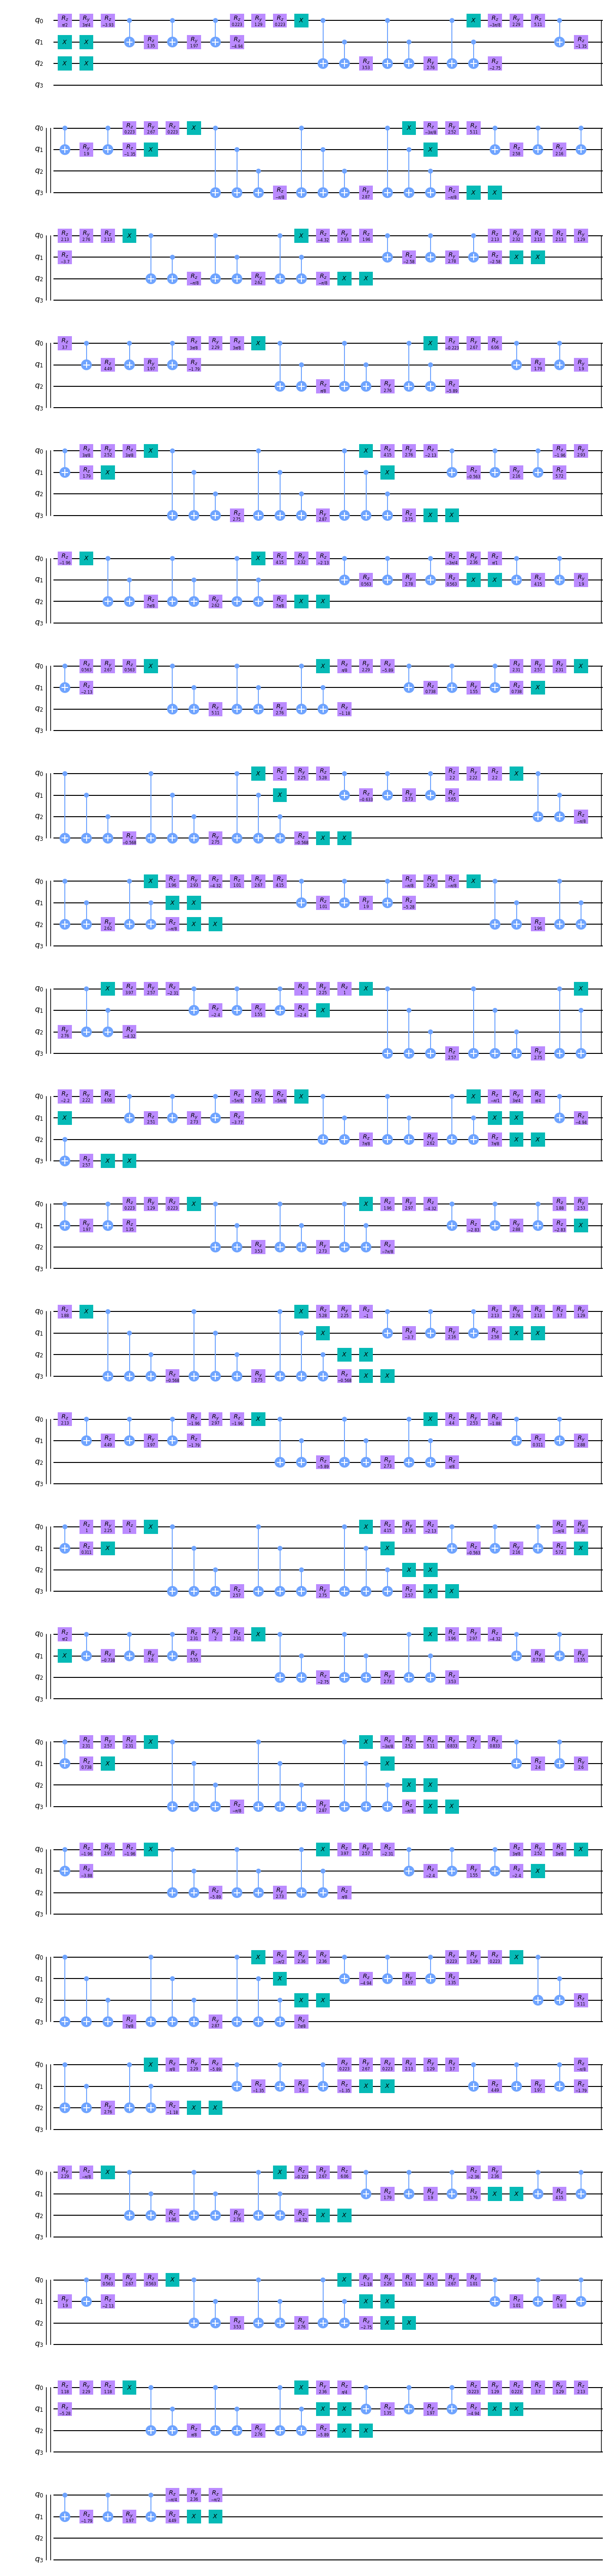

In [141]:
qc = QuantumCircuit(4)
qc.x(1 )
qc.x(2 )
qc.rz(1.570796289167992,0 )
qc.ry(2.3561944901923444,0 )
qc.rz(-3.9269908435934804,0 )
qc.x(1 )
qc.cx( 0 , 1 )
qc.rz(1.3480157105287576,1 )
qc.cx( 0 , 1 )
qc.ry(1.970913155897291,1 )
qc.cx( 0 , 1 )
qc.rz(-4.935169596650828,1 )
qc.rz(0.22278063433128842,0 )
qc.ry(1.2866583704108874,0 )
qc.rz(0.2227806343312882,0 )
qc.x(0 )
qc.x(2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(3.534291703171945,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.ry(2.7634794576421142,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(-2.748893604007641,2 )
qc.x(0 )
qc.rz(-1.1780972395858398,0 )
qc.ry(2.289724695865582,0 )
qc.rz(5.105088067593746,0 )
qc.cx( 0 , 1 )
qc.rz(-1.3480156924636082,1 )
qc.cx( 0 , 1 )
qc.ry(1.8993092473472002,1 )
qc.cx( 0 , 1 )
qc.rz(-1.3480156924636086,1 )
qc.x(1 )
qc.rz(0.22278061626613907,0 )
qc.ry(2.668503598979189,0 )
qc.rz(0.22278061626613885,0 )
qc.x(0 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.rz(-0.3926990495821522,3 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.ry(2.872627871141767,3 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.rz(-0.3926990495821524,3 )
qc.x(0 )
qc.x(3 )
qc.rz(-1.1780972395858398,0 )
qc.ry(2.515496820049216,0 )
qc.rz(5.105088067593746,0 )
qc.x(1 )
qc.cx( 0 , 1 )
qc.rz(2.5789751153272302,1 )
qc.cx( 0 , 1 )
qc.ry(2.1615709258000617,1 )
qc.cx( 0 , 1 )
qc.rz(-3.704210191852356,1 )
qc.rz(2.133413884704672,0 )
qc.ry(2.756534780997484,0 )
qc.rz(2.133413884704672,0 )
qc.x(0 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(-0.39269908720905655,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.ry(2.6203236662809717,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(-0.3926990872090568,2 )
qc.x(0 )
qc.x(2 )
qc.rz(-4.319689930802538,0 )
qc.ry(2.9289174922281704,0 )
qc.rz(1.9634953763770489,0 )
qc.cx( 0 , 1 )
qc.rz(-2.5789750956800184,1 )
qc.cx( 0 , 1 )
qc.ry(2.7779821501008968,1 )
qc.cx( 0 , 1 )
qc.rz(-2.5789750956800175,1 )
qc.x(1 )
qc.rz(2.13341386505746,0 )
qc.ry(2.3184464147184953,0 )
qc.rz(2.133413865057459,0 )
qc.x(3 )
qc.rz(2.1334138448403923,0 )
qc.ry(1.2866583704108865,0 )
qc.rz(3.704210171635288,0 )
qc.x(1 )
qc.cx( 0 , 1 )
qc.rz(4.489608357047483,1 )
qc.cx( 0 , 1 )
qc.ry(1.970913155897291,1 )
qc.cx( 0 , 1 )
qc.rz(-1.793576950132102,1 )
qc.rz(1.1780972383726362,0 )
qc.ry(2.2897246958655817,0 )
qc.rz(1.1780972383726367,0 )
qc.x(0 )
qc.x(2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(0.39269905677192707,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.ry(2.7634794576421147,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(-5.890486250407659,2 )
qc.x(0 )
qc.rz(-0.22278060907636332,0 )
qc.ry(2.668503598979189,0 )
qc.rz(6.060404698103223,0 )
qc.cx( 0 , 1 )
qc.rz(1.7935769599129816,1 )
qc.cx( 0 , 1 )
qc.ry(1.8993092473472006,1 )
qc.cx( 0 , 1 )
qc.rz(1.7935769599129812,1 )
qc.x(1 )
qc.rz(1.1780972383726367,0 )
qc.ry(2.515496820049216,0 )
qc.rz(1.1780972383726362,0 )
qc.x(0 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.rz(2.7488936031560183,3 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.ry(2.872627871141767,3 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.rz(2.7488936031560183,3 )
qc.x(0 )
qc.x(3 )
qc.rz(4.149771423326538,0 )
qc.ry(2.756534780997484,0 )
qc.rz(-2.1334138838530485,0 )
qc.x(1 )
qc.cx( 0 , 1 )
qc.rz(-0.5626175398107827,1 )
qc.cx( 0 , 1 )
qc.ry(2.1615709258000617,1 )
qc.cx( 0 , 1 )
qc.rz(5.720567767368804,1 )
qc.rz(-1.9634953854007386,0 )
qc.ry(2.9289174922281704,0 )
qc.rz(-1.963495385400739,0 )
qc.x(0 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(2.748893568657606,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.ry(2.6203236662809717,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(2.748893568657607,2 )
qc.x(0 )
qc.x(2 )
qc.rz(4.1497714398452565,0 )
qc.ry(2.3184464147184953,0 )
qc.rz(-2.1334138673343297,0 )
qc.cx( 0 , 1 )
qc.rz(0.5626175408387065,1 )
qc.cx( 0 , 1 )
qc.ry(2.7779821501008968,1 )
qc.cx( 0 , 1 )
qc.rz(0.5626175408387063,1 )
qc.x(1 )
qc.x(3 )
qc.rz(-2.356194495585383,0 )
qc.ry(2.3561945337304264,0 )
qc.rz(3.1415925806075498,0 )
qc.x(1 )
qc.cx( 0 , 1 )
qc.rz(4.149771418956302,1 )
qc.cx( 0 , 1 )
qc.ry(1.8993092418885054,1 )
qc.cx( 0 , 1 )
qc.rz(-2.1334138882232843,1 )
qc.rz(0.5626175091023939,0 )
qc.ry(2.668503615184574,0 )
qc.rz(0.5626175091023946,0 )
qc.x(0 )
qc.x(2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(5.105088037156615,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.ry(2.7634794770437603,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(-1.178097270022971,2 )
qc.x(0 )
qc.rz(0.3926990601379887,0 )
qc.ry(2.2897246876833663,0 )
qc.rz(-5.890486247041597,0 )
qc.cx( 0 , 1 )
qc.rz(0.7375865827027043,1 )
qc.cx( 0 , 1 )
qc.ry(1.5496361298294785,1 )
qc.cx( 0 , 1 )
qc.rz(0.737586582702704,1 )
qc.x(1 )
qc.rz(2.308382933582067,0 )
qc.ry(2.5660714347321605,0 )
qc.rz(2.308382933582068,0 )
qc.x(0 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.rz(-0.5676680976886697,3 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.ry(2.745492312942036,3 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.rz(-0.5676680976886699,3 )
qc.x(0 )
qc.x(3 )
qc.rz(-1.0031282013247957,0 )
qc.ry(2.2546701688154105,0 )
qc.rz(5.280057105854791,0 )
qc.x(1 )
qc.cx( 0 , 1 )
qc.rz(-0.6332107334361727,1 )
qc.cx( 0 , 1 )
qc.ry(2.7262523625181494,1 )
qc.cx( 0 , 1 )
qc.rz(5.649974573743414,1 )
qc.rz(2.2040070442386916,0 )
qc.ry(2.21787796681943,0 )
qc.rz(2.2040070442386908,0 )
qc.x(0 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(-0.39269907664791526,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.ry(2.6203236702172132,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(-0.3926990766479155,2 )
qc.x(0 )
qc.x(2 )
qc.rz(1.9634953934481174,0 )
qc.ry(2.9289174980073134,0 )
qc.rz(-4.319689913731469,0 )
qc.x(1 )
qc.x(3 )
qc.rz(1.0081788105027274,0 )
qc.ry(2.6685036151845742,0 )
qc.rz(4.149771367523976,0 )
qc.x(1 )
qc.cx( 0 , 1 )
qc.rz(1.0081787724375748,1 )
qc.cx( 0 , 1 )
qc.ry(1.8993092418885065,1 )
qc.cx( 0 , 1 )
qc.rz(-5.27500653474201,1 )
qc.rz(-0.3926990672090551,0 )
qc.ry(2.289724687683367,0 )
qc.rz(-0.39269906720905534,0 )
qc.x(0 )
qc.x(2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(1.9634953280927758,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.ry(2.763479477043759,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(-4.31968997908681,2 )
qc.x(0 )
qc.rz(3.974802324461627,0 )
qc.ry(2.5660714347321587,0 )
qc.rz(-2.3083829827179594,0 )
qc.cx( 0 , 1 )
qc.rz(-2.4040060683013014,1 )
qc.cx( 0 , 1 )
qc.ry(1.5496361298294794,1 )
qc.cx( 0 , 1 )
qc.rz(-2.4040060683013014,1 )
qc.x(1 )
qc.rz(1.003128201149158,0 )
qc.ry(2.25467016881541,0 )
qc.rz(1.0031282011491593,0 )
qc.x(0 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.rz(2.5739245331397247,3 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.ry(2.745492312942036,3 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.rz(2.573924533139724,3 )
qc.x(0 )
qc.x(3 )
qc.rz(-2.204007046013175,0 )
qc.ry(2.21787796681943,0 )
qc.rz(4.079178261166412,0 )
qc.x(1 )
qc.cx( 0 , 1 )
qc.rz(2.5083819412483774,1 )
qc.cx( 0 , 1 )
qc.ry(2.7262523625181494,1 )
qc.cx( 0 , 1 )
qc.rz(-3.774803365931209,1 )
qc.rz(-1.9634954064954964,0 )
qc.ry(2.9289174980073134,0 )
qc.rz(-1.9634954064954968,0 )
qc.x(0 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(2.7488935805228714,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.ry(2.6203236702172132,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(2.7488935805228714,2 )
qc.x(0 )
qc.x(1 )
qc.x(2 )
qc.x(3 )
qc.rz(-3.1415926429324266,0 )
qc.ry(2.3561944901923444,0 )
qc.rz(0.785398088506936,0 )
qc.x(1 )
qc.cx( 0 , 1 )
qc.rz(-4.935169596650828,1 )
qc.cx( 0 , 1 )
qc.ry(1.9709131558972912,1 )
qc.cx( 0 , 1 )
qc.rz(1.348015710528758,1 )
qc.rz(0.22278063433128814,0 )

qc.ry(1.286658370410887,0 )
qc.rz(0.22278063433128792,0 )
qc.x(0 )
qc.x(2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(3.5342917407988503,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.ry(2.734152828757552,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(-2.748893566380736,2 )
qc.x(0 )
qc.rz(1.96349543266132,0 )
qc.ry(2.9743811794361337,0 )
qc.rz(-4.319689874518266,0 )
qc.cx( 0 , 1 )
qc.rz(-2.8306527902430645,1 )
qc.cx( 0 , 1 )
qc.ry(2.8775126327947422,1 )
qc.cx( 0 , 1 )
qc.rz(-2.8306527902430627,1 )
qc.x(1 )
qc.rz(1.881736197440357,0 )
qc.ry(2.5260946573353333,0 )
qc.rz(1.8817361974403557,0 )
qc.x(0 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.rz(-0.5676680843426957,3 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.ry(2.7454923054745004,3 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.rz(-0.5676680843426959,3 )
qc.x(0 )
qc.x(3 )
qc.rz(5.280057112698203,0 )
qc.ry(2.2546701623799104,0 )
qc.rz(-1.0031281944813832,0 )
qc.x(1 )
qc.cx( 0 , 1 )
qc.rz(-3.704210191162,1 )
qc.cx( 0 , 1 )
qc.ry(2.16157092672285,1 )
qc.cx( 0 , 1 )
qc.rz(2.5789751160175864,1 )
qc.rz(2.1334138847046713,0 )
qc.ry(2.7565347813223897,0 )
qc.rz(2.1334138847046713,0 )
qc.x(1 )
qc.x(2 )
qc.x(3 )
qc.rz(3.7042102199195592,0 )
qc.ry(1.286658370410887,0 )
qc.rz(2.1334137965561193,0 )
qc.x(1 )
qc.cx( 0 , 1 )
qc.rz(4.489608357047484,1 )
qc.cx( 0 , 1 )
qc.ry(1.970913155897291,1 )
qc.cx( 0 , 1 )
qc.rz(-1.7935769501321024,1 )
qc.rz(-1.9634953693059813,0 )
qc.ry(2.9743811794361337,0 )
qc.rz(-1.9634953693059818,0 )
qc.x(0 )
qc.x(2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(-5.890486228536895,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.ry(2.7341528287575523,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(0.3926990786426905,2 )
qc.x(0 )
qc.rz(4.401449113508488,0 )
qc.ry(2.5260946573353333,0 )
qc.rz(-1.8817361936710981,0 )
qc.cx( 0 , 1 )
qc.rz(0.31093985593251533,1 )
qc.cx( 0 , 1 )
qc.ry(2.8775126327947422,1 )
qc.cx( 0 , 1 )
qc.rz(0.3109398559325151,1 )
qc.x(1 )
qc.rz(1.0031281919585362,0 )
qc.ry(2.2546701623799104,0 )
qc.rz(1.0031281919585358,0 )
qc.x(0 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.rz(2.5739245525014405,3 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.ry(2.7454923054745004,3 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.rz(2.5739245525014414,3 )
qc.x(0 )
qc.x(3 )
qc.rz(4.149771428691456,0 )
qc.ry(2.7565347813223897,0 )
qc.rz(-2.1334138784881302,0 )
qc.x(1 )
qc.cx( 0 , 1 )
qc.rz(-0.5626175411914933,1 )
qc.cx( 0 , 1 )
qc.ry(2.16157092672285,1 )
qc.cx( 0 , 1 )
qc.rz(5.720567765988093,1 )
qc.x(1 )
qc.x(2 )
qc.x(3 )
qc.rz(-0.7853981205062158,0 )
qc.ry(2.3561945337304273,0 )
qc.rz(1.570796205528378,0 )
qc.x(1 )
qc.cx( 0 , 1 )
qc.rz(-0.7375866147098606,1 )
qc.cx( 0 , 1 )
qc.ry(2.6012066483999225,1 )
qc.cx( 0 , 1 )
qc.rz(5.545598692469726,1 )
qc.rz(2.3083829192771708,0 )
qc.ry(1.996741882400976,0 )
qc.rz(2.30838291927717,0 )
qc.x(0 )
qc.x(2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(-2.7488935832313754,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.ry(2.734152831757664,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(3.534291723948211,2 )
qc.x(0 )
qc.rz(1.963495440075532,0 )
qc.ry(2.974381183973303,0 )
qc.rz(-4.319689867104055,0 )
qc.cx( 0 , 1 )
qc.rz(0.737586580702705,1 )
qc.cx( 0 , 1 )
qc.ry(1.549636130940342,1 )
qc.cx( 0 , 1 )
qc.rz(0.7375865807027048,1 )
qc.x(1 )
qc.rz(2.308382928217148,0 )
qc.ry(2.566071435028136,0 )
qc.rz(2.308382928217148,0 )
qc.x(0 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.rz(-0.3926990557986934,3 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.ry(2.872627878999793,3 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.rz(-0.39269905579869363,3 )
qc.x(0 )
qc.x(3 )
qc.rz(-1.1780972507990417,0 )
qc.ry(2.5154968253462187,0 )
qc.rz(5.105088056380543,0 )
qc.x(2 )
qc.x(3 )
qc.rz(0.8332098477318036,0 )
qc.ry(1.9967418824009764,0 )
qc.rz(0.833209654594716,0 )
qc.x(1 )
qc.cx( 0 , 1 )
qc.rz(2.4040060680220683,1 )
qc.cx( 0 , 1 )
qc.ry(2.601206648399922,1 )
qc.cx( 0 , 1 )
qc.rz(-3.879179239157518,1 )
qc.rz(-1.963495398448116,0 )
qc.ry(2.974381183973303,0 )
qc.rz(-1.9634953984481165,0 )
qc.x(0 )
qc.x(2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(-5.890486234112665,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.ry(2.7341528317576635,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(0.39269907306692087,2 )
qc.x(0 )
qc.rz(3.9748023244616264,0 )
qc.ry(2.5660714350281353,0 )
qc.rz(-2.30838298271796,0 )
qc.cx( 0 , 1 )
qc.rz(-2.4040060658870885,1 )
qc.cx( 0 , 1 )
qc.ry(1.549636130940342,1 )
qc.cx( 0 , 1 )
qc.rz(-2.4040060658870894,1 )
qc.x(1 )
qc.rz(1.1780972516569077,0 )
qc.ry(2.5154968253462187,0 )
qc.rz(1.1780972516569082,0 )
qc.x(0 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.rz(2.7488935698655044,3 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.ry(2.872627878999793,3 )
qc.cx( 0 , 3 )
qc.cx( 1 , 3 )
qc.cx( 2 , 3 )
qc.rz(2.7488935698655044,3 )
qc.x(0 )
qc.x(2 )
qc.rz(-1.5707962305283814,0 )
qc.ry(2.3561944466542633,0 )
qc.rz(2.3561944623011106,0 )
qc.x(1 )
qc.cx( 0 , 1 )
qc.rz(-4.935169612085567,1 )
qc.cx( 0 , 1 )
qc.ry(1.9709131275971563,1 )
qc.cx( 0 , 1 )
qc.rz(1.3480156950940192,1 )
qc.rz(0.22278062318226358,0 )
qc.ry(1.2866583701229608,0 )
qc.rz(0.22278062318226335,0 )
qc.x(0 )
qc.x(2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(5.1050880259157205,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.ry(2.7634794417737965,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(-1.1780972812638655,2 )
qc.x(0 )
qc.rz(0.39269910411732356,0 )
qc.ry(2.2897247109957637,0 )
qc.rz(-5.890486203062263,0 )
qc.cx( 0 , 1 )
qc.rz(-1.3480157056836997,1 )
qc.cx( 0 , 1 )
qc.ry(1.8993092454331912,1 )
qc.cx( 0 , 1 )
qc.rz(-1.3480157056837,1 )
qc.x(1 )
qc.rz(0.22278061962980922,0 )
qc.ry(2.6685035887795543,0 )
qc.rz(0.222780619629809,0 )
qc.x(2 )
qc.rz(2.1334139087414226,0 )
qc.ry(1.2866583701229604,0 )
qc.rz(3.7042101389677775,0 )
qc.x(1 )
qc.cx( 0 , 1 )
qc.rz(4.489608377825949,1 )
qc.cx( 0 , 1 )
qc.ry(1.9709131275971559,1 )
qc.cx( 0 , 1 )
qc.rz(-1.7935769293536374,1 )
qc.rz(-0.3926991132594606,0 )
qc.ry(2.2897247109957632,0 )
qc.rz(-0.39269911325946083,0 )
qc.x(0 )
qc.x(2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(1.9634954663909794,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.ry(2.763479441773797,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(-4.319689840788607,2 )
qc.x(0 )
qc.rz(-0.22278060799115673,0 )
qc.ry(2.6685035887795547,0 )
qc.rz(6.060404699188428,0 )
qc.cx( 0 , 1 )
qc.rz(1.793576952906093,1 )
qc.cx( 0 , 1 )
qc.ry(1.8993092454331906,1 )
qc.cx( 0 , 1 )
qc.rz(1.7935769529060916,1 )
qc.x(1 )
qc.x(2 )
qc.rz(-2.3561944606571714,0 )
qc.ry(2.3561945184766153,0 )
qc.x(1 )
qc.cx( 0 , 1 )
qc.rz(4.149771456200084,1 )
qc.cx( 0 , 1 )
qc.ry(1.8993092456643828,1 )
qc.cx( 0 , 1 )
qc.rz(-2.133413850979502,1 )
qc.rz(0.5626174919224306,0 )
qc.ry(2.6685035880932086,0 )
qc.rz(0.5626174919224304,0 )
qc.x(0 )
qc.x(2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(3.534291696617335,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.ry(2.7634794737796127,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(-2.7488936105622512,2 )
qc.x(0 )
qc.rz(-1.1780972559618423,0 )
qc.ry(2.289724697498018,0 )
qc.rz(5.105088051217743,0 )
qc.x(1 )
qc.x(2 )
qc.rz(4.149771505107879,0 )
qc.ry(2.668503588093209,0 )
qc.rz(1.008178698381002,0 )
qc.x(1 )
qc.cx( 0 , 1 )
qc.rz(1.0081787876102917,1 )
qc.cx( 0 , 1 )
qc.ry(1.8993092456643823,1 )
qc.cx( 0 , 1 )
qc.rz(-5.275006519569295,1 )
qc.rz(1.1780972568197094,0 )
qc.ry(2.289724697498018,0 )
qc.rz(1.178097256819709,0 )
qc.x(0 )
qc.x(2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(0.3926990655310263,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.ry(2.7634794737796127,2 )
qc.cx( 0 , 2 )
qc.cx( 1 , 2 )
qc.rz(-5.89048624164856,2 )
qc.x(0 )
qc.x(1 )
qc.x(2 )
qc.ry(2.3561944466542633,0 )
qc.rz(0.7853981555062152,0 )
qc.x(1 )
qc.cx( 0 , 1 )
qc.rz(1.3480156950940194,1 )
qc.cx( 0 , 1 )
qc.ry(1.9709131275971579,1 )
qc.cx( 0 , 1 )
qc.rz(-4.935169612085566,1 )
qc.rz(0.22278062318226372,0 )
qc.ry(1.2866583701229612,0 )
qc.rz(0.2227806231822635,0 )
qc.x(1 )
qc.rz(3.7042102155363184,0 )
qc.ry(1.2866583701229612,0 )
qc.rz(2.1334138321728835,0 )
qc.x(1 )
qc.cx( 0 , 1 )
qc.rz(-1.7935769293536379,1 )
qc.cx( 0 , 1 )
qc.ry(1.9709131275971568,1 )
qc.cx( 0 , 1 )
qc.rz(4.489608377825949,1 )
qc.x(1 )
qc.rz(-0.7853981338622773,0 )
qc.ry(2.3561945162427476,0 )
qc.rz(-1.570796275528383,0 )
qc.x(1 )
qc.x(2 )
qc.draw('mpl')


In [142]:
result = execute(qc, backend).result()
print(result.get_unitary())

[[ 0.06518531+0.34952365j  0.23666739+0.00924624j -0.16320977-0.19559645j
  -0.00596813-0.13694033j  0.11968798-0.0089934j  -0.1744552 -0.2382959j
   0.13671361+0.33640194j  0.1057368 -0.10842044j  0.12578378-0.01470534j
  -0.24975623+0.17504823j -0.2013104 -0.38656405j -0.248261  +0.04159161j
   0.13300978+0.14969386j  0.1135044 +0.14751489j -0.07177103+0.16388353j
   0.06744982-0.06086606j]
 [ 0.23855953-0.01379857j -0.09178195+0.09888088j -0.08953051+0.14668799j
  -0.12793506+0.19335887j -0.12364316+0.23848132j -0.14693678+0.16108155j
   0.1467235 -0.05157508j  0.42459149-0.00726009j  0.27989044+0.17538315j
  -0.07136835+0.28140642j  0.14046732-0.09727203j  0.05492379-0.2480095j
  -0.09805178+0.01655193j -0.0795748 +0.17582131j  0.14523786-0.35431481j
   0.17965211+0.06365484j]
 [-0.12810166-0.10424541j  0.39016646-0.10231429j -0.03764226+0.02934344j
   0.02491659+0.18887023j  0.29531002-0.19464845j -0.18397778+0.227343j
  -0.02077703+0.05722248j -0.10724425+0.218896j   -0.09476875+

In [34]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit.quantum_info.operators import Operator
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager

from qiskit.transpiler.passes import Unroller, Unroll3qOrMore

circuit = QuantumCircuit(4)
count=0
qasms = []
for matrix in twoLevelMatrices:
    matrix1 = matrix.get_full_matrix()
    #print(matrix1)
    r = Operator(matrix1)
    sub_circuit = QuantumCircuit(4)
    #print('qc.unitary(',repr(r),',[0,1,2,3])')
    sub_circuit.unitary(r, [0,1,2,3])
    circuit.unitary(r, [0,1,2,3])

    pass_ = Unroller(['u3', 'cx'])
    #pass_ = Unroll3qOrMore()
    pm = PassManager(pass_)
    new_circ = pm.run(sub_circuit)
    #new_circ = sub_circuit.decompose()
    #print(new_circ.qasm())
    qasms.append(new_circ.data)
    print(count)
    count=count+1
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118


QiskitError: 'A diagonal entry has not absolute value one.'

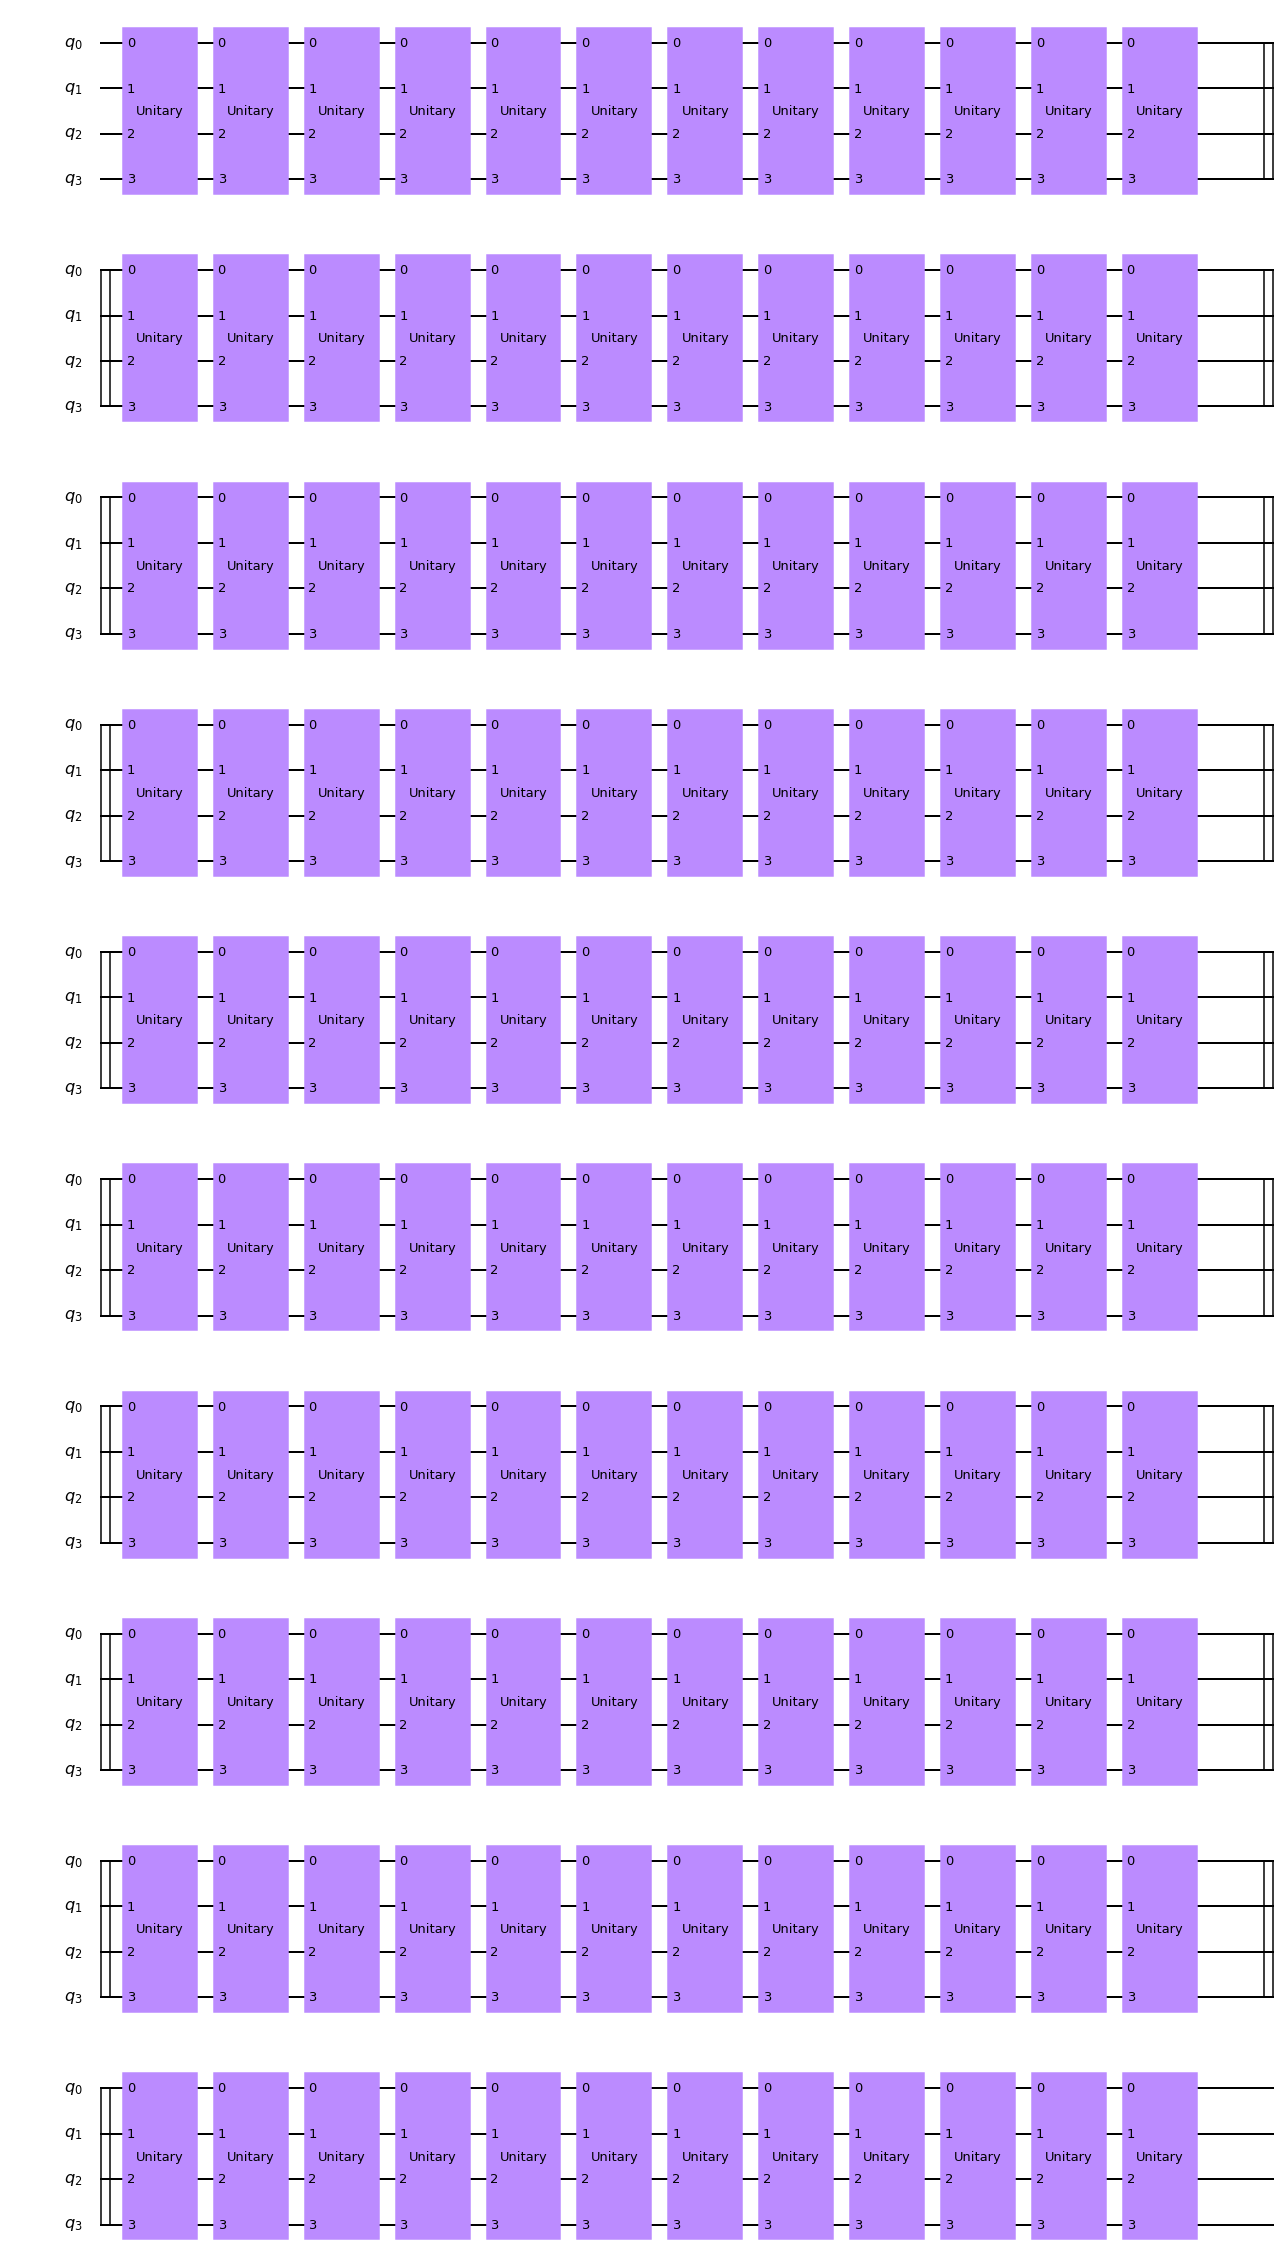

In [17]:
circuit.draw('mpl')

In [22]:
result = execute(circuit, backend).result()
print(result.get_unitary())

[[-0.21338835+0.33838835j -0.14016504-0.08838835j  0.21338835-0.08838835j
   0.03661165+0.08838835j  0.08838835-0.03661165j -0.08838835-0.21338835j
  -0.08838835+0.14016504j  0.33838835+0.21338835j  0.21338835-0.08838835j
   0.03661165+0.08838835j  0.39016504+0.08838835j -0.03661165+0.16161165j
   0.16161165+0.03661165j  0.08838835-0.39016504j  0.08838835-0.03661165j
  -0.08838835-0.21338835j]
 [-0.14016504-0.08838835j -0.21338835+0.33838835j  0.03661165+0.08838835j
   0.21338835-0.08838835j -0.08838835-0.21338835j  0.08838835-0.03661165j
   0.33838835+0.21338835j -0.08838835+0.14016504j  0.03661165+0.08838835j
   0.21338835-0.08838835j -0.03661165+0.16161165j  0.39016504+0.08838835j
   0.08838835-0.39016504j  0.16161165+0.03661165j -0.08838835-0.21338835j
   0.08838835-0.03661165j]
 [ 0.21338835-0.08838835j  0.03661165+0.08838835j -0.21338835+0.33838835j
  -0.14016504-0.08838835j -0.08838835+0.14016504j  0.33838835+0.21338835j
   0.08838835-0.03661165j -0.08838835-0.21338835j  0.39016

In [33]:
pass_ = Unroller(['u3', 'cx'])
#pass_ = Unroll3qOrMore()
pm = PassManager(pass_)
new_circ = pm.run(circuit)
new_circ.draw('mpl')

QiskitError: 'A diagonal entry has not absolute value one.'

In [53]:
from scipy.stats import unitary_group
U = B
np.linalg.norm(U - result.get_unitary())

0.0

In [43]:
print(qasm[0])
print(qasm[1])
qr = QuantumRegister(4,'q')
qc = QuantumCircuit(qr)
for qasm in qasms:
    temp_circ = QuantumCircuit(qr)
    temp_circ.data = qasm
    #print(temp_circ)
    #qc.append(temp_circ)
    qc = qc + temp_circ
    qc.barrier()

qc.draw('mpl')    

(<qiskit.circuit.library.standard_gates.u3.U3Gate object at 0x0000011950D02D30>, [Qubit(QuantumRegister(4, 'q'), 3)], [])
(<qiskit.circuit.library.standard_gates.x.CXGate object at 0x00000119500FA4F0>, [Qubit(QuantumRegister(4, 'q'), 3), Qubit(QuantumRegister(4, 'q'), 2)], [])


ValueError: Image size of 1683x423771 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1683.19x423772 with 1 Axes>

In [46]:
result = execute(qc, backend).result()
print(result.get_unitary())

[[-2.14454457e-01+3.37713708e-01j -1.39885594e-01-8.88299459e-02j
   2.13666037e-01-8.77149517e-02j  3.63327193e-02+8.85033716e-02j
   8.85033716e-02-3.63327193e-02j -8.77149517e-02-2.13666037e-01j
  -8.88299459e-02+1.39885594e-01j  3.37713708e-01+2.14454457e-01j
   2.13666037e-01-8.77149517e-02j  3.63327193e-02+8.85033716e-02j
   3.89884350e-01+8.96183658e-02j -3.71211392e-02+1.61495384e-01j
   1.61495384e-01+3.71211392e-02j  8.96183658e-02-3.89884350e-01j
   8.85033716e-02-3.63327193e-02j -8.77149517e-02-2.13666037e-01j]
 [-1.39885596e-01-8.88299435e-02j -2.14454458e-01+3.37713707e-01j
   3.63327208e-02+8.85033710e-02j  2.13666037e-01-8.77149511e-02j
  -8.77149511e-02-2.13666037e-01j  8.85033710e-02-3.63327208e-02j
   3.37713707e-01+2.14454458e-01j -8.88299435e-02+1.39885596e-01j
   3.63327208e-02+8.85033710e-02j  2.13666037e-01-8.77149511e-02j
  -3.71211365e-02+1.61495385e-01j  3.89884350e-01+8.96183670e-02j
   8.96183670e-02-3.89884350e-01j  1.61495385e-01+3.71211365e-02j
  -8.7714

In [50]:
qc.qasm(formatted=True,filename='abc.qasm')

OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
u3(0,0,-pi/2) q[3];
cx q[3],q[2];
cx q[3],q[2];
cx q[3],q[1];
cx q[2],q[1];
cx q[3],q[1];
cx q[2],q[1];
cx q[3],q[0];
u3(0,0,1.4726216) q[0];
cx q[1],q[0];
u3(0,0,0.098174762) q[0];
cx q[2],q[0];
u3(0,0,-0.098174762) q[0];
cx q[1],q[0];
u3(0,0,0.098174762) q[0];
cx q[3],q[0];
u3(0,0,-0.098174762) q[0];
cx q[1],q[0];
u3(0,0,0.098174762) q[0];
cx q[2],q[0];
u3(0,0,-0.098174762) q[0];
cx q[1],q[0];
u3(0,0,-1.5922815) q[0];
u3(1.3855846,0,0) q[0];
u3(0,0,0.23032875) q[0];
cx q[1],q[0];
u3(0,0,-1.7971679) q[0];
u3(1.5496786,0,0) q[0];
u3(0,0,1.3855428) q[0];
cx q[2],q[0];
u3(0,0,1.7560498) q[0];
u3(1.5496786,0,0) q[0];
u3(0,0,-1.3444248) q[0];
cx q[1],q[0];
u3(0,0,-1.7971679) q[0];
u3(1.5496786,0,0) q[0];
u3(0,0,1.3855428) q[0];
cx q[3],q[0];
u3(0,0,1.7560498) q[0];
u3(1.5496786,0,0) q[0];
u3(0,0,-1.3444248) q[0];
cx q[1],q[0];
u3(0,0,-1.7971679) q[0];
u3(1.5496786,0,0) q[0];
u3(0,0,1.3855428) q[0];
cx q[2],q[0];
u3(0,0,1.7560498) q[0];
u3(1.54

In [207]:

get_angles(twoLevelMatrices[0].matrix_2x2)

[[ 0.50271191+0.15687343j -0.71854318-0.45427653j]
 [ 0.71854318-0.45427653j  0.50271191-0.15687343j]]
(0.502711905472707+0.1568734343518326j) (-0.7185431784493386-0.454276530754763j) (0.7185431784493386-0.454276530754763j) (0.502711905472707-0.1568734343518326j)
angles:  (2.1065752970256204-0.3590886034373231j) (2.47703884642901-0.04316986422238094j) (-0.4629932999449975+0.043169864222380915j)
Phasing by first element...
Matrix([[0.502711905472707 + 0.156873434351833*I, -0.718543178449339 - 0.454276530754763*I], [0.718543178449339 - 0.454276530754763*I, 0.502711905472707 - 0.156873434351833*I]])
ph:  0.302478810837425
divisor :  0.954601016152298 + 0.297887394766883*I
Matrix([[0.526619914463305 - 2.77555756156289e-17*I, -0.821245300547314 - 0.219607882416848*I], [0.550598796046766 - 0.647697793328426*I, 0.433158677128903 - 0.29950307967912*I]])
[]


((2.1065752970256204-0.3590886034373231j),
 (-0.4629932999449975+0.043169864222380915j),
 (2.47703884642901-0.04316986422238094j))

[[ 1.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          1.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.50271191+0.15687343j
  -0.71854318-0.45427653j]
 [ 0.        +0.j          0.        +0.j          0.71854318-0.45427653j
   0.50271191-0.15687343j]]


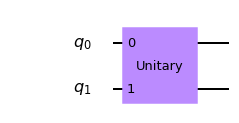

In [217]:
circuit = QuantumCircuit(2)
matrix = twoLevelMatrices[0]
matrix1 = matrix.get_full_matrix()
print(matrix1)
#print(matrix1)
r = Operator(matrix1)
#print('qc.unitary(',repr(r),',[0,1,2,3])')
circuit.unitary(r, [0,1])


#circuit.cx(0,3)
#circuit.cx(1,3)
#circuit.cx(2,3)
#circuit.u3(pi,pi,pi,3)
circuit.draw('mpl')

In [218]:
result = execute(circuit, backend).result()
print(result.get_unitary())

[[ 1.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          1.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.50271191+0.15687343j
  -0.71854318-0.45427653j]
 [ 0.        +0.j          0.        +0.j          0.71854318-0.45427653j
   0.50271191-0.15687343j]]


[[ 0.50271191+0.15687343j -0.71854318-0.45427653j]
 [ 0.71854318-0.45427653j  0.50271191-0.15687343j]]
(0.502711905472707+0.1568734343518326j) (-0.7185431784493386-0.454276530754763j) (0.7185431784493386-0.454276530754763j) (0.502711905472707-0.1568734343518326j)
angles:  (2.1065752970256204-0.3590886034373231j) (2.47703884642901-0.04316986422238094j) (-0.4629932999449975+0.043169864222380915j)
Phasing by first element...
Matrix([[0.502711905472707 + 0.156873434351833*I, -0.718543178449339 - 0.454276530754763*I], [0.718543178449339 - 0.454276530754763*I, 0.502711905472707 - 0.156873434351833*I]])
ph:  0.302478810837425
divisor :  0.954601016152298 + 0.297887394766883*I
Matrix([[0.526619914463305 - 2.77555756156289e-17*I, -0.821245300547314 - 0.219607882416848*I], [0.550598796046766 - 0.647697793328426*I, 0.433158677128903 - 0.29950307967912*I]])
[]


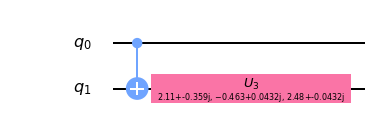

In [216]:
circuit = QuantumCircuit(2)
#theta, phi, lambda1 = getEulerAngles_for_U3(matrix.matrix_2x2)
theta, phi, lambda1 = get_angles(matrix.matrix_2x2)
circuit.cx(0,1)
circuit.u3(theta, phi, lambda1,1)

circuit.draw('mpl')

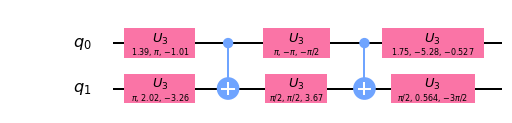

In [220]:
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager

from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circ = pm.run(circuit)
new_circ.draw(output='mpl')

In [221]:
result = execute(circuit, backend).result()
print(result.get_unitary())

[[ 1.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          1.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.50271191+0.15687343j
  -0.71854318-0.45427653j]
 [ 0.        +0.j          0.        +0.j          0.71854318-0.45427653j
   0.50271191-0.15687343j]]


In [223]:
print(new_circ.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
u3(1.388314127079501,3.141592653589793,-1.0070227732420065) q[0];
u3(3.141592653589793,2.0178317809859685,-3.2583307529516112) q[1];
cx q[0],q[1];
u3(3.141592653589793,-3.141592653589793,-1.5707963267948966) q[0];
u3(1.5707963267948966,1.5707963267948966,3.66832570888743) q[1];
cx q[0],q[1];
u3(1.7532785265102924,-5.276162533937581,-0.5267330552976377) q[0];
u3(1.5707963267948966,0.56377355355289,-4.71238898038469) q[1];



In [51]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit.quantum_info.operators import Operator
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager

from qiskit.transpiler.passes import Unroller, Unroll3qOrMore

circuit = QuantumCircuit(4)
count=0
qasms = []
r = Operator(B)
circuit.unitary(r, [0,1,2,3])
    


In [52]:
result = execute(circuit, backend).result()
print(result.get_unitary())

[[-0.21338835+0.33838835j -0.14016504-0.08838835j  0.21338835-0.08838835j
   0.03661165+0.08838835j  0.08838835-0.03661165j -0.08838835-0.21338835j
  -0.08838835+0.14016504j  0.33838835+0.21338835j  0.21338835-0.08838835j
   0.03661165+0.08838835j  0.39016504+0.08838835j -0.03661165+0.16161165j
   0.16161165+0.03661165j  0.08838835-0.39016504j  0.08838835-0.03661165j
  -0.08838835-0.21338835j]
 [-0.14016504-0.08838835j -0.21338835+0.33838835j  0.03661165+0.08838835j
   0.21338835-0.08838835j -0.08838835-0.21338835j  0.08838835-0.03661165j
   0.33838835+0.21338835j -0.08838835+0.14016504j  0.03661165+0.08838835j
   0.21338835-0.08838835j -0.03661165+0.16161165j  0.39016504+0.08838835j
   0.08838835-0.39016504j  0.16161165+0.03661165j -0.08838835-0.21338835j
   0.08838835-0.03661165j]
 [ 0.21338835-0.08838835j  0.03661165+0.08838835j -0.21338835+0.33838835j
  -0.14016504-0.08838835j -0.08838835+0.14016504j  0.33838835+0.21338835j
   0.08838835-0.03661165j -0.08838835-0.21338835j  0.39016

In [55]:
pass_ = Unroller(['u3', 'cx'])
#pass_ = Unroll3qOrMore()
pm = PassManager(pass_)
new_circ = circuit.decompose()

#new_circ = pm.run(circuit)



In [56]:
result = execute(new_circ, backend).result()
print(result.get_unitary())

QiskitError: 'A diagonal entry has not absolute value one.'

u3(0,0,-pi/2) q[3];

cx q[3],q[2];

cx q[3],q[2];

cx q[3],q[1];

cx q[2],q[1];

cx q[3],q[1];

cx q[2],q[1];

cx q[3],q[0];

u3(0,0,1.4726216) q[0];

cx q[1],q[0];

u3(0,0,0.098174762) q[0];

cx q[2],q[0];

u3(0,0,-0.098174762) q[0];

cx q[1],q[0];

u3(0,0,0.098174762) q[0];

cx q[3],q[0];

u3(0,0,-0.098174762) q[0];

cx q[1],q[0];

u3(0,0,0.098174762) q[0];

cx q[2],q[0];

u3(0,0,-0.098174762) q[0];

cx q[1],q[0];

u3(0,0,-1.5922815) q[0];

u3(1.3855846,0,0) q[0];

u3(0,0,0.23032875) q[0];

cx q[1],q[0];

u3(0,0,-1.7971679) q[0];

u3(1.5496786,0,0) q[0];

u3(0,0,1.3855428) q[0];

cx q[2],q[0];

u3(0,0,1.7560498) q[0];

u3(1.5496786,0,0) q[0];

u3(0,0,-1.3444248) q[0];

cx q[1],q[0];

u3(0,0,-1.7971679) q[0];

u3(1.5496786,0,0) q[0];

u3(0,0,1.3855428) q[0];

cx q[3],q[0];

u3(0,0,1.7560498) q[0];

u3(1.5496786,0,0) q[0];

u3(0,0,-1.3444248) q[0];

cx q[1],q[0];

u3(0,0,-1.7971679) q[0];

u3(1.5496786,0,0) q[0];

u3(0,0,1.3855428) q[0];

cx q[2],q[0];

u3(0,0,1.7560498) q[0];

u3(1.54


u3(0,0,0.022086189) q[1];

cx q[0],q[1];

u3(0,0,1.5500961) q[1];

u3(1.574522,0,0) q[1];

u3(0,0,-1.2146609) q[1];

cx q[2],q[1];

u3(0,0,1.2146609) q[1];

u3(1.5670707,0,0) q[1];

u3(0,0,-1.5914966) q[1];

cx q[0],q[1];

u3(0,0,-1.5500961) q[1];

u3(1.5670707,0,0) q[1];

u3(0,0,1.9269318) q[1];

cx q[3],q[1];

u3(0,0,1.2146609) q[1];

u3(1.5670707,0,0) q[1];

u3(0,0,-1.5914966) q[1];

cx q[0],q[1];

u3(0,0,-1.5500961) q[1];

u3(1.5670707,0,0) q[1];

u3(0,0,1.9269318) q[1];

cx q[2],q[1];

u3(0,0,1.2146609) q[1];

u3(1.5670707,0,0) q[1];

u3(0,0,-1.5914966) q[1];

cx q[0],q[1];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-3.1195065) q[1];

u3(1.9269292,0,0) q[1];

u3(0,0,2.6679724) q[1];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2


cx q[3],q[2];

cx q[3],q[2];

u3(0,0,-0.17500661) q[2];

cx q[3],q[1];

cx q[2],q[1];

u3(0,0,pi/2) q[1];

cx q[3],q[1];

cx q[2],q[1];

u3(0,0,0.57731664) q[1];

cx q[3],q[0];

u3(0,0,-0.53335347) q[0];

cx q[1],q[0];

u3(0,0,-1.0374429) q[0];

cx q[2],q[0];

u3(0,0,-0.53335347) q[0];

cx q[1],q[0];

u3(0,0,0.53335347) q[0];

cx q[3],q[0];

u3(0,0,-1.0374429) q[0];

cx q[1],q[0];

u3(0,0,1.0374429) q[0];

cx q[2],q[0];

u3(0,0,0.53335347) q[0];

cx q[1],q[0];

u3(0,0,-0.017822182) q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

cx q[1],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],

u3(pi/2,0,0) q[0];

u3(0,0,3.1202428) q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-pi/2) q[2];

u3(pi/2,0,0) q[2];

cx q[3],q[2];

u3(0,0,-pi) q[2];

u3(pi/2,0,0) q[2];

u3(0,0,2.9211309) q[2];

cx q[2],q[1];

u3(0,0,pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-pi/2) q[1];

cx q[3],q[1];

u3(0,0,pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-pi/2) q[1];

cx q[2],q[1];

u3(0,0,-pi) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-0.14697453) q[1];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,3.0

u3(pi/2,0,0) q[1];

u3(0,0,pi/2) q[1];

cx q[3],q[1];

u3(0,0,pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-pi/2) q[1];

cx q[2],q[1];

u3(0,0,-pi) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-0.097060238) q[1];

cx q[1],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,3.0861297) q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0

u3(pi/2,0,0) q[1];

u3(0,0,pi/2) q[1];

cx q[3],q[1];

u3(0,0,pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-pi/2) q[1];

cx q[2],q[1];

u3(0,0,-pi) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,0.29739157) q[1];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-2.9716546) q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

cx q[1],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,


u3(1.5834573,0,0) q[2];

u3(0,0,-1.6543457) q[2];

cx q[3],q[2];

u3(0,0,1.6543457) q[2];

u3(1.5581354,0,0) q[2];

u3(0,0,-1.2701762) q[2];

cx q[0],q[2];

u3(0,0,1.2701762) q[2];

u3(1.5834573,0,0) q[2];

u3(0,0,-1.487247) q[2];

cx q[1],q[2];

u3(0,0,-1.6274102) q[1];

u3(1.4324053,0,0) q[1];

u3(0,0,0.77569791) q[1];

u3(0,0,1.487247) q[2];

u3(1.5581354,0,0) q[2];

u3(0,0,-1.8714165) q[2];

cx q[0],q[2];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/8) q[0];

u3(0,0,-2.8399123) q[2];

u3(1.654339,0,0) q[2];

u3(0,0,2.8531658) q[2];

cx q[2],q[1];

u3(0,0,pi/2) q[1];

u3(2.9452431,0,0) q[1];

u3(0,0,-pi/4) q[1];

cx q[3],q[1];

u3(0,0,pi/4) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-pi/2) q[1];

cx q[2],q[1];

u3(0,0,pi) q[1];

u3(3*pi/4,0,0) q[1];

u3(0,0,1.7671459) q[1];

cx q[1],q[0];

u3(0,0,5*pi/8) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-3*pi/8) q[0];

cx q[1],q[0];

u3(0,0,-3*pi/8) q[0];

u3(3*pi/4,0,0) q[0


u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,pi) q[0];

u3(pi,0,0) q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,2.8000178) q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[1];

u3(pi/2,0,0) q[1];

cx q[2],q[1];

u3(0,0,-pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,pi/2) q[1];

cx q[3],q[1];

u3(0,0,pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-pi/2) q[1];

cx q[2],q[1];

u3(0,0,pi) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,0.08179876) q[1];

cx q[1],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,p

cx q[1],q[0];

u3(0,0,1.2734093) q[0];

u3(1.608305,0,0) q[0];

u3(0,0,-1.3216703) q[0];

cx q[2],q[0];

u3(0,0,1.3216703) q[0];

u3(1.5332876,0,0) q[0];

u3(0,0,-1.8681834) q[0];

cx q[1],q[0];

u3(0,0,-2.8346655) q[0];

u3(1.8197434,0,0) q[0];

u3(0,0,-2.8697252) q[0];

u3(0,0,-1.4823498) q[1];

u3(1.2816664,0,0) q[1];

u3(0,0,-0.59018983) q[1];

cx q[0],q[1];

u3(0,0,-1.0058848) q[1];

u3(1.6555626,0,0) q[1];

u3(0,0,1.2805943) q[1];

cx q[2],q[1];

u3(0,0,1.8609983) q[1];

u3(1.6555626,0,0) q[1];

u3(0,0,-2.1357079) q[1];

cx q[0],q[1];

u3(0,0,-pi/2) q[0];

u3(3*pi/8,0,0) q[0];

u3(0,0,-2.5514028) q[1];

u3(1.2816664,0,0) q[1];

u3(0,0,-0.77566989) q[1];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,3*pi/8) q[0];

cx q[2],q[0];

u3(0,0,5*pi/8) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,1.2053066) q[0];

u3(0.85888576,0,0) q[0];

u3(0,0,-1.0408935) q[0];

cx q[3],q[0];

u3(0,0,1.8450143) q[0];

u3(1.5327269,0,0) q[0];

u3(0,0,-1.2965783)

cx q[1],q[0];

u3(0,0,-1.5895749) q[0];

u3(1.5745269,0,0) q[0];

u3(0,0,1.9629994) q[0];

cx q[3],q[0];

u3(0,0,1.9629994) q[0];

u3(1.5745269,0,0) q[0];

u3(0,0,-1.5895749) q[0];

cx q[1],q[0];

u3(0,0,-1.5520177) q[0];

u3(1.5745269,0,0) q[0];

u3(0,0,1.1785933) q[0];

cx q[2],q[0];

u3(0,0,1.9629994) q[0];

u3(1.5745269,0,0) q[0];

u3(0,0,-1.5895749) q[0];

cx q[1],q[0];

u3(0,0,-3.121271) q[0];

u3(1.1785961,0,0) q[0];

u3(0,0,3.1375556) q[0];

u3(0,0,-1.6430849) q[2];

u3(1.3758994,0,0) q[2];

u3(0,0,0.70857129) q[2];

cx q[0],q[2];

u3(0,0,-2.2653443) q[2];

u3(1.4998787,0,0) q[2];

u3(0,0,1.3754019) q[2];

cx q[1],q[2];

u3(0,0,-1.6486648) q[1];

u3(2.3371598,0,0) q[1];

u3(0,0,-0.19267029) q[1];

u3(0,0,1.7661907) q[2];

u3(1.4998787,0,0) q[2];

u3(0,0,-0.87624835) q[2];

cx q[0],q[2];

u3(0,0,-pi/2) q[0];

u3(5*pi/8,0,0) q[0];

u3(0,0,2.4330214) q[2];

u3(1.3758994,0,0) q[2];

u3(0,0,1.5449101) q[2];

cx q[2],q[1];

u3(0,0,pi/2) q[1];

u3(1.7671459,0,0) q[1];

u3(0,0,-3*pi/4)

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-3.1127577) q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

cx q[1],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-

cx q[1],q[0];

u3(0,0,0.14065439) q[0];

cx q[2],q[0];

u3(0,0,-1.4301419) q[0];

cx q[1],q[0];

u3(0,0,0.35588719) q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,pi) q[0];

u3(pi,0,0) q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,2.7681237) q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[1];

u3(pi/2,0,0) q[1];

cx q[2],q[1];

u3(0,0,-pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,pi/2) q[1];

cx q[3],q[1];

u3(0,0,pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-pi/2) q[1];

cx q[2],q[1];

u3(0,0,-pi) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,0.030768148) q[1];

cx q[1],q[0

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,2.3887345) q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,pi) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-2.8239047) q[0];

u3(0,0,-1.5659043) q[0];

u3(1.1788309,0,0) q[0];

u3(0,0,-0.024639799) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-2.9676274) q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[1];

u3(pi/2,0,0) q[1];

cx q[2],q[1];

u3(0,0,-pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,pi/2) q[1];

cx q[3],q[1];

u3(0,0,pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-pi/2) q[1];

cx q[2],q[1];

u3(0,0,-pi) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,1.1208983) q[1];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];



u3(0,0,-1.2965783) q[0];

cx q[2],q[0];

u3(0,0,1.2965783) q[0];

u3(1.5327269,0,0) q[0];

u3(0,0,-1.8450143) q[0];

cx q[1],q[0];

u3(0,0,2.8566685) q[0];

u3(1.2967821,0,0) q[0];

u3(0,0,2.39574) q[0];

barrier q[0],q[1],q[2],q[3];

u3(0,0,-pi/4) q[3];

cx q[3],q[2];

u3(0,0,pi/4) q[2];

cx q[3],q[2];

u3(0,0,0.93098852) q[2];

cx q[3],q[1];

u3(0,0,-pi/4) q[1];

cx q[2],q[1];

u3(0,0,-pi/4) q[1];

cx q[3],q[1];

u3(0,0,pi/4) q[1];

cx q[2],q[1];

u3(0,0,-1.2690053) q[1];

cx q[3],q[0];

u3(0,0,0.88357293) q[0];

cx q[1],q[0];

u3(0,0,-0.88357293) q[0];

cx q[2],q[0];

u3(0,0,0.68722339) q[0];

cx q[1],q[0];

u3(0,0,0.88357293) q[0];

cx q[3],q[0];

u3(0,0,-0.68722339) q[0];

cx q[1],q[0];

u3(0,0,-0.88357293) q[0];

cx q[2],q[0];

u3(0,0,0.68722339) q[0];

cx q[1],q[0];

u3(0,0,0.22360085) q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[


u3(0,0,-1.5717574) q[2];

u3(1.5768941,0,0) q[2];

u3(0,0,-0.31263613) q[2];

cx q[0],q[2];

u3(0,0,-1.2581661) q[2];

u3(1.5698353,0,0) q[2];

u3(0,0,1.5768941) q[2];

cx q[1],q[2];

u3(0,0,1.5646986) q[2];

u3(1.5698353,0,0) q[2];

u3(0,0,-1.8834266) q[2];

cx q[0],q[2];

u3(0,0,-1.2581661) q[2];

u3(1.5698353,0,0) q[2];

u3(0,0,1.5768941) q[2];

cx q[3],q[2];

u3(0,0,1.5646986) q[2];

u3(1.5698353,0,0) q[2];

u3(0,0,-1.8834266) q[2];

cx q[0],q[2];

u3(0,0,-1.2581661) q[2];

u3(1.5698353,0,0) q[2];

u3(0,0,1.5768941) q[2];

cx q[1],q[2];

u3(0,0,-1.6274102) q[1];

u3(1.4324053,0,0) q[1];

u3(0,0,0.77569791) q[1];

u3(0,0,1.5646986) q[2];

u3(1.5698353,0,0) q[2];

u3(0,0,-1.8834266) q[2];

cx q[0],q[2];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/8) q[0];

u3(0,0,-2.8289565) q[2];

u3(1.5768941,0,0) q[2];

u3(0,0,2.7564624) q[2];

cx q[2],q[1];

u3(0,0,-2.3522308) q[1];

u3(1.6119596,0,0) q[1];

u3(0,0,1.4322872) q[1];

cx q[3],q[1];

u3(0,0,1.6401889) q[1];

u3(1.5422221,0,


u3(pi/2,0,0) q[1];

u3(0,0,-pi/2) q[1];

cx q[2],q[1];

u3(0,0,-pi) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,0.4101937) q[1];

cx q[1],q[0];

u3(0,0,-1.3565297) q[0];

u3(1.5982068,0,0) q[0];

u3(0,0,1.3172727) q[0];

cx q[2],q[0];

u3(0,0,1.3172727) q[0];

u3(1.5982068,0,0) q[0];

u3(0,0,-1.3565297) q[0];

cx q[1],q[0];

u3(0,0,-1.3565297) q[0];

u3(1.5982068,0,0) q[0];

u3(0,0,1.3172727) q[0];

cx q[3],q[0];

u3(0,0,1.8243199) q[0];

u3(1.5982068,0,0) q[0];

u3(0,0,-1.785063) q[0];

cx q[1],q[0];

u3(0,0,-1.785063) q[0];

u3(1.5982068,0,0) q[0];

u3(0,0,1.8243199) q[0];

cx q[2],q[0];

u3(0,0,1.8243199) q[0];

u3(1.5982068,0,0) q[0];

u3(0,0,-1.785063) q[0];

cx q[1],q[0];

u3(0,0,2.920225) q[0];

u3(1.8242226,0,0) q[0];

u3(0,0,-2.9355114) q[0];

barrier q[0],q[1],q[2],q[3];

u3(0,0,-1.1290099) q[3];

cx q[3],q[2];

u3(0,0,3*pi/8) q[2];

cx q[3],q[2];

u3(0,0,-1.8051927) q[2];

cx q[3],q[1];

u3(0,0,pi/32) q[1];

cx q[2],q[1];

u3(0,0,0.72527025) q[1];

cx q[3],q[1];

u3(0,0,-pi/32) q[1];


u3(0,0,-pi/2) q[1];

u3(pi/2,0,0) q[1];

cx q[2],q[1];

u3(0,0,-pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,pi/2) q[1];

cx q[3],q[1];

u3(0,0,pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-pi/2) q[1];

cx q[2],q[1];

u3(0,0,-pi) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,0.71419917) q[1];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-2.7334788) q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

cx q[1],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0]


cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,pi) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,2.6722395) q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,2.496386) q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-pi/2) q[2];

u3(pi/2,0,0) q[


u3(0,0,-1.6911584) q[0];

cx q[1],q[0];

u3(0,0,-1.5090631) q[0];

u3(1.3996214,0,0) q[0];

u3(0,0,1.9484688) q[0];

cx q[3],q[0];

u3(0,0,1.1833224) q[0];

u3(1.5588572,0,0) q[0];

u3(0,0,-1.6316306) q[0];

cx q[1],q[0];

u3(0,0,-1.5099621) q[0];

u3(1.5588572,0,0) q[0];

u3(0,0,1.9582703) q[0];

cx q[2],q[0];

u3(0,0,1.1833224) q[0];

u3(1.5588572,0,0) q[0];

u3(0,0,-1.6316306) q[0];

cx q[1],q[0];

u3(0,0,-3.0758862) q[0];

u3(1.9582412,0,0) q[0];

u3(0,0,2.9949536) q[0];

u3(0,0,-1.5674551) q[2];

u3(1.588603,0,0) q[2];

u3(0,0,0.37095104) q[2];

cx q[0],q[2];

u3(0,0,-1.9416879) q[2];

u3(1.574137,0,0) q[2];

u3(0,0,1.5886031) q[2];

cx q[1],q[2];

u3(0,0,1.5529895) q[2];

u3(1.574137,0,0) q[2];

u3(0,0,-1.1999048) q[2];

cx q[0],q[2];

u3(0,0,1.1999048) q[2];

u3(1.5674557,0,0) q[2];

u3(0,0,-1.5886031) q[2];

cx q[3],q[2];

u3(0,0,1.5886031) q[2];

u3(1.574137,0,0) q[2];

u3(0,0,-1.9416879) q[2];

cx q[0],q[2];

u3(0,0,1.9416879) q[2];

u3(1.5674557,0,0) q[2];

u3(0,0,-1.552989

u3(0,0,-0.8002814) q[0];

cx q[1],q[0];

u3(0,0,2.1830086) q[0];

cx q[3],q[0];

u3(0,0,0.8002814) q[0];

cx q[1],q[0];

u3(0,0,0.95858408) q[0];

cx q[2],q[0];

u3(0,0,-0.77051493) q[0];

cx q[1],q[0];

u3(0,0,-0.07304044) q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,pi) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-2.4111087) q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[1];

u3(pi/2,0,0) q[1];

cx q[2],q[1];

u3(0,0,-pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,pi/2) q[1];

cx q[3],q[1];

u3(0,0,pi/2) q[1];




u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,pi) q[0];

u3(pi,0,0) q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,2.4549445) q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-pi/2) q[2];

u3(pi/2,0,0) q[2];

cx q[3],q[2];

u3(0,0,-pi) q[2];

u3(pi/2,0,0) q[2];

u3(0,0,2.7228159) q[2];

cx q[2],q[1];

u3(0,0,pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-pi/2) q[1];

cx q[3],q[1];

u3(0,0,pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-pi/2) q[1];

cx q[2],q[1];

u3(0,0,-pi) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-0.2791845) q[1];

cx q[1],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[2],q[0];



cx q[1],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-2.8133208) q[0];

u3(0,0,-1.5959959) q[0];

u3(1.8710156,0,0) q[0];

u3(0,0,-0.16623668) q[0];

u3(0,0,-pi/2) q[1];

u3(pi/2,0,0) q[1];

cx q[2],q[1];

u3(0,0,pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-pi/2) q[1];

cx q[3],q[1];

u3(0,0,pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-pi/2) q[1];

cx q[2],q[1];

u3(0,0,-pi) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-1.2026409) q[1];

cx q[1],q[0];

u3(0,0,1.4120133) q[0];

u3(1.5948686,0,0) q[0];

u3(0,0,-1.2704873) q[0];

cx q[2],q[0];

u3(0,0,1.2704873) q[0];

u3(1.5467241,0,0) q[0];

u3(0,0,-1.7295793) q[0];

cx q[1],q[0];

u3(0,0,-0.081212557) q[0];

u3(0.30124314,0,0) q[0];

u3(0,0,-0.081212557) q[0];

cx q[3],q[0];

u3(0,0,1.7295793) q[0];

u3(1.5948686,0,0) q[0];

u3(0,0,-1.8711053) q[0];

cx q[1],q[0];

u3(0,0,-1.8711053) q[0];

u3(1.


cx q[3],q[1];

cx q[2],q[1];

cx q[3],q[1];

u3(0,0,pi/2) q[1];

cx q[2],q[1];

u3(0,0,0.38186821) q[1];

cx q[3],q[0];

u3(0,0,-0.23439639) q[0];

cx q[1],q[0];

u3(0,0,-1.8051927) q[0];

cx q[2],q[0];

u3(0,0,1.3363999) q[0];

cx q[1],q[0];

u3(0,0,-0.23439639) q[0];

cx q[3],q[0];

u3(0,0,-1.3363999) q[0];

cx q[1],q[0];

u3(0,0,0.23439639) q[0];

cx q[2],q[0];

u3(0,0,0.23439639) q[0];

cx q[1],q[0];

u3(0,0,-1.372011) q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,2.94545

u3(0,0,-1.3777393) q[1];

cx q[0],q[1];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,2.9419099) q[1];

u3(1.3129214,0,0) q[1];

u3(0,0,2.4750355) q[1];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-2.6761306) q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[1];

u3(pi/2,0,0) q[1];

cx q[2],q[1];

u3(0,0,-pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,pi/2) q[1];

cx q[3],q[1];

u3(0,0,pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-pi/2) q[1];

cx q[2],q[1];

u3(0,0,pi) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,0.78206056) q


cx q[1],q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,2.6947908) q[0];

u3(0,0,-1.5758366) q[0];

u3(1.8171146,0,0) q[0];

u3(0,0,-0.040712522) q[0];

u3(0,0,-pi/2) q[1];

u3(pi/2,0,0) q[1];

cx q[2],q[1];

u3(0,0,-pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,pi/2) q[1];

cx q[3],q[1];

u3(0,0,pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-pi/2) q[1];

cx q[2],q[1];

u3(0,0,pi) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-1.0099175) q[1];

cx q[1],q[0];

u3(0,0,1.5313128) q[0];

u3(1.5756845,0,0) q[0];

u3(0,0,-1.3244751) q[0];

cx q[2],q[0];

u3(0,0,1.3244751) q[0];

u3(1.5659082,0,0) q[0];

u3(0,0,-1.6102798) q[0];

cx q[1],q[0];

u3(0,0,-0.020044301) q[0];

u3(0.24636878,0,0) q[0];

u3(0,0,-0.020044301) q[0];

cx q[3],q[0];

u3(0,0,1.6102798) q[0];

u3(1.5756845,0,0) q[0];

u3(0,0,-1.8171176) q[0];

cx q[1],q[0];

u3(0,0,-1.8171176) q[0];

u3(1.5


cx q[1],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-pi) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,2.9222581) q[0];

u3(0,0,-pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[1];

u3(pi/2,0,0) q[1];

cx q[2],q[1];

u3(0,0,-pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,pi/2) q[1];

cx q[3],q[1];

u3(0,0,pi/2) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,-pi/2) q[1];

cx q[2],q[1];

u3(0,0,pi) q[1];

u3(pi/2,0,0) q[1];

u3(0,0,0.77750794) q[1];

cx q[1],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[2],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[3],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];


cx q[1],q[0];

u3(0,0,-0.65835684) q[0];

cx q[2],q[0];

u3(0,0,0.65835684) q[0];

cx q[1],q[0];

u3(0,0,-0.47396019) q[0];

cx q[3],q[0];

u3(0,0,0.47396019) q[0];

cx q[1],q[0];

u3(0,0,-0.65835684) q[0];

cx q[2],q[0];

u3(0,0,0.65835684) q[0];

cx q[1],q[0];

u3(0,0,1.0968361) q[0];

u3(0,0,-1.6037364) q[0];

u3(1.7580937,0,0) q[0];

u3(0,0,-0.3472127) q[0];

cx q[1],q[0];

u3(0,0,1.9118733) q[0];

u3(1.6031601,0,0) q[0];

u3(0,0,-1.758193) q[0];

cx q[2],q[0];

u3(0,0,1.758193) q[0];

u3(1.5384326,0,0) q[0];

u3(0,0,-1.2297194) q[0];

cx q[1],q[0];

u3(0,0,1.1817457) q[0];

u3(1.3535839,0,0) q[0];

u3(0,0,-1.3789364) q[0];

cx q[3],q[0];

u3(0,0,1.4744404) q[0];

u3(1.5522761,0,0) q[0];

u3(0,0,-1.9503012) q[0];

cx q[1],q[0];

u3(0,0,1.9503012) q[0];

u3(1.5893166,0,0) q[0];

u3(0,0,-1.6671523) q[0];

cx q[2],q[0];

u3(0,0,1.6671523) q[0];

u3(1.5522761,0,0) q[0];

u3(0,0,-1.1912914) q[0];

cx q[1],q[0];

u3(0,0,2.7602978) q[0];

u3(1.474457,0,0) q[0];

u3(0,0,1.8434855) q[0];

u

u3(0,0,-2.7496765) q[0];

u3(1.5453446,0,0) q[0];

u3(0,0,3.1143566) q[0];

u3(0,0,-1.6143199) q[1];

u3(1.9477742,0,0) q[1];

u3(0,0,-0.22722002) q[1];

cx q[0],q[1];

u3(0,0,-1.3596066) q[1];

u3(1.5303307,0,0) q[1];

u3(0,0,1.9480986) q[1];

cx q[3],q[1];

u3(0,0,1.1934941) q[1];

u3(1.5303307,0,0) q[1];

u3(0,0,-1.781986) q[1];

cx q[0],q[1];

u3(0,0,-pi/2) q[0];

u3(3*pi/8,0,0) q[0];

u3(0,0,-2.9143726) q[1];

u3(1.9477742,0,0) q[1];

u3(0,0,1.2933645) q[1];

cx q[1],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-3*pi/8) q[0];

cx q[2],q[0];

u3(0,0,5*pi/8) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-1.2053066) q[0];

u3(0.85888576,0,0) q[0];

u3(0,0,1.0408935) q[0];

cx q[3],q[0];

u3(0,0,1.8450143) q[0];

u3(1.6088658,0,0) q[0];

u3(0,0,-1.8450143) q[0];

cx q[1],q[0];

u3(0,0,1.8450143) q[0];

u3(1.5327269,0,0) q[0];

u3(0,0,-1.2965783) q[0];

cx q[2],q[0];

u3(0,0,1.8450143) q[0];

u3(1.6088658,0,0) q[0];

u3(0,0,-1.8450143) q[0];

cx q[1],q[


u3(0,0,2.5261129) q[1];

cx q[3],q[1];

u3(0,0,1.0408935) q[1];

u3(1.7177715,0,0) q[1];

u3(0,0,-1.0408935) q[1];

cx q[2],q[1];

u3(0,0,2.5261129) q[1];

u3(2*pi/3,0,0) q[1];

u3(0,0,-0.95531662) q[1];

cx q[1],q[0];

u3(0,0,-1.9285925) q[0];

u3(1.5426644,0,0) q[0];

u3(0,0,1.4155286) q[0];

cx q[2],q[0];

u3(0,0,1.726064) q[0];

u3(1.5426644,0,0) q[0];

u3(0,0,-1.2130002) q[0];

cx q[1],q[0];

u3(0,0,1.3406703) q[0];

u3(2.2704275,0,0) q[0];

u3(0,0,-1.367347) q[0];

cx q[3],q[0];

u3(0,0,1.2230952) q[0];

u3(1.5398979,0,0) q[0];

u3(0,0,-1.746294) q[0];

cx q[1],q[0];

u3(0,0,1.746294) q[0];

u3(1.6016947,0,0) q[0];

u3(0,0,-1.9184975) q[0];

cx q[2],q[0];

u3(0,0,1.9184975) q[0];

u3(1.5398979,0,0) q[0];

u3(0,0,-1.3952986) q[0];

cx q[1],q[0];

u3(0,0,2.9548988) q[0];

u3(1.2232682,0,0) q[0];

u3(0,0,2.4930148) q[0];

u3(0,0,-1.5459971) q[2];

u3(1.3559803,0,0) q[2];

u3(0,0,-0.22900517) q[2];

cx q[0],q[2];

u3(0,0,1.7945141) q[2];

u3(1.5465672,0,0) q[2];

u3(0,0,-1.3559162) 

u3(0,0,pi/2) q[3];

cx q[3],q[2];

cx q[3],q[2];

cx q[3],q[1];

u3(0,0,-1.1224021) q[1];

cx q[2],q[1];

u3(0,0,-0.44839424) q[1];

cx q[3],q[1];

u3(0,0,0.44839424) q[1];

cx q[2],q[1];

u3(0,0,-0.44178647) q[1];

cx q[3],q[0];

u3(0,0,-0.34443767) q[0];

cx q[1],q[0];

u3(0,0,-0.10395657) q[0];

cx q[2],q[0];

u3(0,0,0.10395657) q[0];

cx q[1],q[0];

u3(0,0,0.34443767) q[0];

cx q[3],q[0];

u3(0,0,-0.34443767) q[0];

cx q[1],q[0];

u3(0,0,-0.10395657) q[0];

cx q[2],q[0];

u3(0,0,0.10395657) q[0];

cx q[1],q[0];

u3(0,0,0.34443767) q[0];

u3(0,0,-1.6008292) q[0];

u3(1.2131481,0,0) q[0];

u3(0,0,0.16578417) q[0];

cx q[1],q[0];

u3(0,0,1.4155286) q[0];

u3(1.5989283,0,0) q[0];

u3(0,0,-1.2130002) q[0];

cx q[2],q[0];

u3(0,0,1.2130002) q[0];

u3(1.5426644,0,0) q[0];

u3(0,0,-1.726064) q[0];

cx q[1],q[0];

u3(0,0,2.7014787) q[0];

u3(0.42671622,0,0) q[0];

u3(0,0,-2.5789018) q[0];

cx q[3],q[0];

u3(0,0,1.4917117) q[0];

u3(1.5861712,0,0) q[0];

u3(0,0,-1.1869538) q[0];

cx q[1],q[0

u3(0,0,2.0023042) q[1];

u3(1.6907266,0,0) q[1];

u3(0,0,-2.1055487) q[1];

cx q[0],q[1];

u3(0,0,-pi/2) q[0];

u3(3*pi/8,0,0) q[0];

u3(0,0,-2.5518066) q[1];

u3(1.1425934,0,0) q[1];

u3(0,0,-0.62277319) q[1];

cx q[1],q[0];

u3(0,0,pi/2) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-3*pi/8) q[0];

cx q[2],q[0];

u3(0,0,5*pi/8) q[0];

u3(pi/2,0,0) q[0];

u3(0,0,-pi/2) q[0];

cx q[1],q[0];

u3(0,0,-1.2053066) q[0];

u3(0.85888576,0,0) q[0];

u3(0,0,1.0408935) q[0];

cx q[3],q[0];

u3(0,0,1.8450143) q[0];

u3(1.6088658,0,0) q[0];

u3(0,0,-1.8450143) q[0];

cx q[1],q[0];

u3(0,0,1.8450143) q[0];

u3(1.5327269,0,0) q[0];

u3(0,0,-1.2965783) q[0];

cx q[2],q[0];

u3(0,0,1.8450143) q[0];

u3(1.6088658,0,0) q[0];

u3(0,0,-1.8450143) q[0];

cx q[1],q[0];

u3(0,0,-2.8566685) q[0];

u3(1.2967821,0,0) q[0];

u3(0,0,-2.39574) q[0];

barrier q[0],q[1],q[2],q[3];

u3(0,0,pi/4) q[3];

cx q[3],q[2];

u3(0,0,pi/4) q[2];

cx q[3],q[2];

u3(0,0,-pi/4) q[2];

cx q[3],q[1];

u3(0,0,pi/4) q[1];

cx q[2],q[1];

u3(0,0


u3(0,0,-1.9427778) q[0];

cx q[1],q[0];

u3(0,0,-1.1892318) q[0];

u3(1.6273117,0,0) q[0];

u3(0,0,1.6913207) q[0];

cx q[3],q[0];

u3(0,0,1.4799525) q[0];

u3(1.5532672,0,0) q[0];

u3(0,0,-1.9517819) q[0];

cx q[1],q[0];

u3(0,0,-1.1898107) q[0];

u3(1.5532672,0,0) q[0];

u3(0,0,1.6616402) q[0];

cx q[2],q[0];

u3(0,0,1.4799525) q[0];

u3(1.5532672,0,0) q[0];

u3(0,0,-1.9517819) q[0];

cx q[1],q[0];

u3(0,0,-2.7590103) q[0];

u3(1.6616262,0,0) q[0];

u3(0,0,-3.044224) q[0];

u3(0,0,-1.6016077) q[1];

u3(1.7803851,0,0) q[1];

u3(0,0,-0.29089493) q[1];

cx q[0],q[1];

u3(0,0,1.8552788) q[1];

u3(1.6009333,0,0) q[1];

u3(0,0,-1.7804817) q[1];

cx q[2],q[1];

u3(0,0,1.7804817) q[1];

u3(1.5406594,0,0) q[1];

u3(0,0,-1.2863139) q[1];

cx q[0],q[1];

u3(0,0,1.2863139) q[1];

u3(1.6009333,0,0) q[1];

u3(0,0,-1.3611109) q[1];

cx q[3],q[1];

u3(0,0,1.3611109) q[1];

u3(1.5406594,0,0) q[1];

u3(0,0,-1.8552788) q[1];

cx q[0],q[1];

u3(0,0,1.8552788) q[1];

u3(1.6009333,0,0) q[1];

u3(0,0,-1.7


u3(0,0,1.2669692) q[0];

cx q[2],q[0];

u3(0,0,1.8746234) q[0];

u3(1.5630667,0,0) q[0];

u3(0,0,-1.5203168) q[0];

cx q[1],q[0];

u3(0,0,-3.0886896) q[0];

u3(1.8746141,0,0) q[0];

u3(0,0,3.0939982) q[0];

barrier q[0],q[1],q[2],q[3];

u3(0,0,pi/4) q[3];

cx q[3],q[2];

u3(0,0,pi/4) q[2];

cx q[3],q[2];

u3(0,0,-pi/4) q[2];

cx q[3],q[1];

u3(0,0,pi/4) q[1];

cx q[2],q[1];

u3(0,0,-pi/4) q[1];

cx q[3],q[1];

u3(0,0,pi/4) q[1];

cx q[2],q[1];

u3(0,0,-pi/4) q[1];

cx q[3],q[0];

u3(0,0,-1.5151012) q[0];

cx q[1],q[0];

u3(0,0,-0.055695145) q[0];

cx q[2],q[0];

u3(0,0,0.055695145) q[0];

cx q[1],q[0];

u3(0,0,-0.055695145) q[0];

cx q[3],q[0];

u3(0,0,0.055695145) q[0];

cx q[1],q[0];

u3(0,0,-0.055695145) q[0];

cx q[2],q[0];

u3(0,0,0.055695145) q[0];

cx q[1],q[0];

u3(0,0,-pi/4) q[0];

u3(0,0,-1.5630568) q[0];

u3(1.5203183,0,0) q[0];

u3(0,0,-0.30421761) q[0];

cx q[1],q[0];

u3(0,0,1.8746234) q[0];

u3(1.5630667,0,0) q[0];

u3(0,0,-1.5203168) q[0];

cx q[2],q[0];

u3(0,0,1.5203